In [590]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [592]:
!pip install ipykernel

In [593]:
!pip install pymysql

In [594]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [606]:
import pymysql

In [608]:
db=pymysql.connect(host='localhost',user='root',password='Prem1975$',database='demo')

In [610]:
mycursor = db.cursor()

In [612]:
mycursor.execute("SELECT VERSION()")

1

In [17]:
mycursor.fetchone()

('8.0.40',)

In [ ]:
mycursor.execute("create database capstone_project")

In [614]:
db=pymysql.connect(host='localhost',user='root',password='Prem1975$',database='capstone_project')
mycursor=db.cursor()

In [616]:
from sqlalchemy import create_engine

In [618]:
# database connection
hostname="localhost"
dbname="capstone_project"
uname="root"
pwd="Prem1975$"

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [620]:
import pandas as pd
df=pd.read_csv('football_data_merged_cleaned.csv')
df

,Unnamed: 0,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,age_group,total_goals,sub_category
0,0,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
1,1,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
2,2,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
3,3,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
4,4,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3633,3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3634,3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3635,3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late


In [27]:
df.to_sql('football_data_merged_cleaned',engine,index=False)

ValueError: Table 'football_data_merged_cleaned' already exists.

In [622]:
game=pd.read_sql_query("select * from football_data_merged_cleaned",engine)
game

,Unnamed: 0,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,0,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman
1,1,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman
2,2,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman
3,3,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman
4,4,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


# Part-3

# Performance Analysis

# 1.Evaluate and analyze player performance based on various metrics such as goals, assists, yellow cards, red cards, and minutes played.


In [624]:
perform_df=pd.read_sql_query('SELECT name, SUM(goals) AS total_goals, SUM(assists) AS total_assists, SUM(yellow_cards) AS total_yellow_cards, SUM(red_cards) AS total_red_cards, SUM(minutes_played) AS total_minutes_played FROM football_data_merged_cleaned GROUP BY name ORDER BY total_goals DESC, total_assists DESC LIMIT 10;',db)
perform_df

,name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played
0,Christian Pulisic,644.0,252.0,70.0,0.0,81410.0
1,Emmanuel Sabbi,198.0,22.0,99.0,0.0,30371.0
2,Jordan,144.0,48.0,0.0,0.0,15900.0
3,John Anthony Brooks,143.0,0.0,117.0,0.0,24739.0
4,Jonathan Amon,136.0,51.0,17.0,0.0,17935.0
5,Timothy Chandler,96.0,12.0,84.0,0.0,17856.0
6,Weston McKennie,72.0,24.0,84.0,0.0,22512.0
7,Timothy Weah,70.0,10.0,20.0,0.0,4930.0
8,Giovanni Reyna,60.0,36.0,24.0,0.0,5304.0
9,Sergino Dest,60.0,30.0,0.0,0.0,6060.0


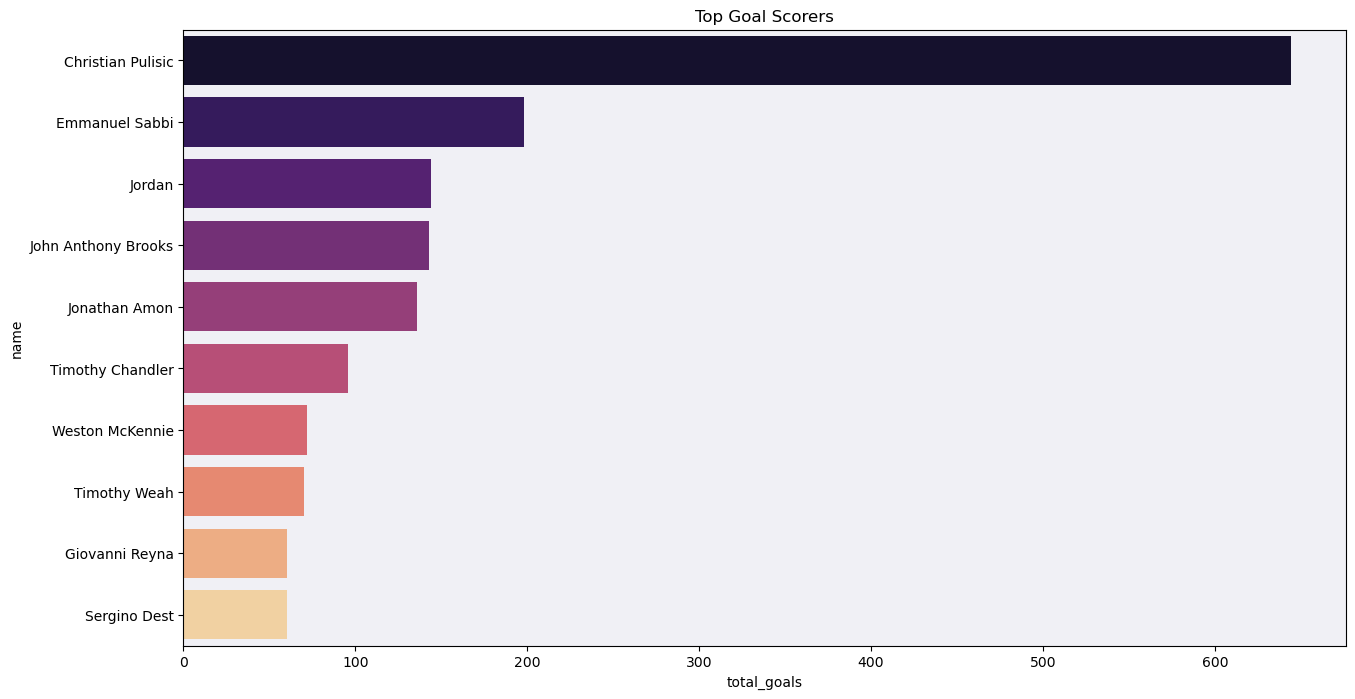

In [626]:
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('#f0f0f5')
sns.barplot(x='total_goals',y='name',data=perform_df,palette='magma')
plt.title('Top Goal Scorers')
plt.show()

In [ ]:
# The plot highlights the top 10 players with the most goals, sorted in descending order.
# Players with high goal counts also tend to have a significant number of assists, reflecting their offensive contribution.
# The visualization provides insights into the most impactful players, helping in scouting, performance analysis, or award considerations.

# 2. Assess team performance in terms of home and away goals, club positions, and manager influence.


In [629]:
home_away=pd.read_sql_query('SELECT home_club_name AS club,home_club_manager_name AS manager,SUM(home_club_goals) AS total_home_goals,SUM(away_club_goals) AS total_away_goals,SUM(home_club_goals + away_club_goals) AS total_goals,AVG(home_club_position) AS avg_home_position,AVG(away_club_position) AS avg_away_position FROM football_data_merged_cleaned GROUP BY home_club_name, home_club_manager_name ORDER BY total_goals DESC, avg_home_position ASC;',db)
home_away

,club,manager,total_home_goals,total_away_goals,total_goals,avg_home_position,avg_away_position
0,Borussia Dortmund,Lucien Favre,448.0,308.0,756.0,3.999384,12.506550
1,Football Club Nords,Kasper Hjulmand,549.0,181.0,730.0,6.651934,8.082873
2,Borussia Dortmund,Peter Bosz,300.0,258.0,558.0,5.838388,7.734109
3,Borussia Dortmund,Peter Stoger,280.0,112.0,392.0,3.957432,10.236674
4,Hobro IK,Peter Rensen,174.0,169.0,343.0,10.227941,8.389706
...,...,...,...,...,...,...,...
168,Borussia Verein für Leibesübung 1900 e.V.,Marco Rose,0.0,0.0,0.0,10.000000,11.000000
169,Yellow-Red Koninklijke Voetbalclub Mechelen,Aleksandar Jankovic,0.0,0.0,0.0,13.000000,4.000000
170,Stade brestois 29,Olivier Dall Oglio,0.0,0.0,0.0,13.000000,2.000000
171,Hertha BSC,Jurgen Klinsmann,0.0,0.0,0.0,13.000000,6.000000


In [630]:
top_10_manger=home_away[['manager','total_home_goals','total_away_goals']].head(10)
top_10_manger

,manager,total_home_goals,total_away_goals
0,Lucien Favre,448.0,308.0
1,Kasper Hjulmand,549.0,181.0
2,Peter Bosz,300.0,258.0
3,Peter Stoger,280.0,112.0
4,Peter Rensen,174.0,169.0
5,Jos Luhukay,182.0,130.0
6,Thomas Tuchel,280.0,28.0
7,Frank Lampard,224.0,84.0
8,Jurgen Klopp,168.0,126.0
9,Julien Stephan,240.0,24.0


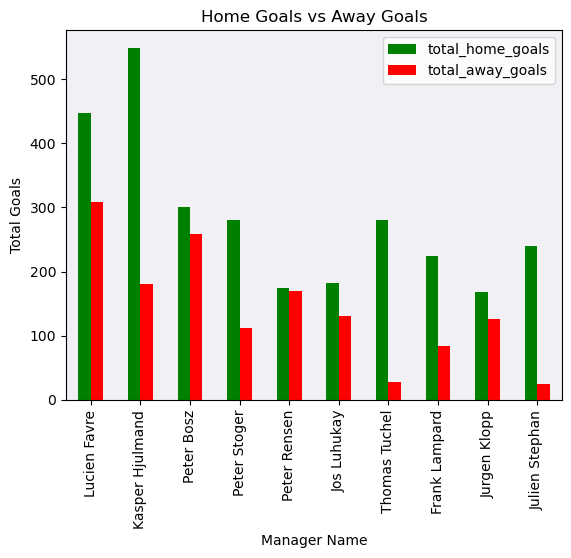

In [631]:
top_10_manger.plot(
    x='manager',
    kind='bar',
    stacked=False,
    title='Home Goals vs Away Goals',
    xlabel='Manager Name',
    ylabel='Total Goals',
    color=['green','red']
   
)
plt.gca().set_facecolor('#f0f0f5')
plt.show()


In [ ]:
# The top 10 managers are ranked based on the total number of goals their teams have scored in home and away matches.
# Green bars represent home goals, while red bars represent away goals, helping compare offensive performances in different environments.
# Some managers have a higher proportion of home goals, suggesting a strong home advantage, while others have a more balanced or away-dominant performance.

In [632]:
df.to_excel('main_project.xlsx')

# 3. Which player has received the highest number of yellow and red cards?

In [637]:
referee_cards=pd.read_sql_query('SELECT name,SUM(yellow_cards) AS total_yellow_cards,SUM(red_cards) AS total_red_cards FROM football_data_merged_cleaned GROUP BY name ORDER BY total_red_cards DESC, total_yellow_cards DESC LIMIT 10;',db)
referee_cards

,name,total_yellow_cards,total_red_cards
0,John Anthony Brooks,117.0,0.0
1,Emmanuel Sabbi,99.0,0.0
2,Timothy Chandler,84.0,0.0
3,Weston McKennie,84.0,0.0
4,Christian Pulisic,70.0,0.0
5,Giovanni Reyna,24.0,0.0
6,Kenny Saief,20.0,0.0
7,Timothy Weah,20.0,0.0
8,Christian Cappis,20.0,0.0
9,Jonathan Amon,17.0,0.0


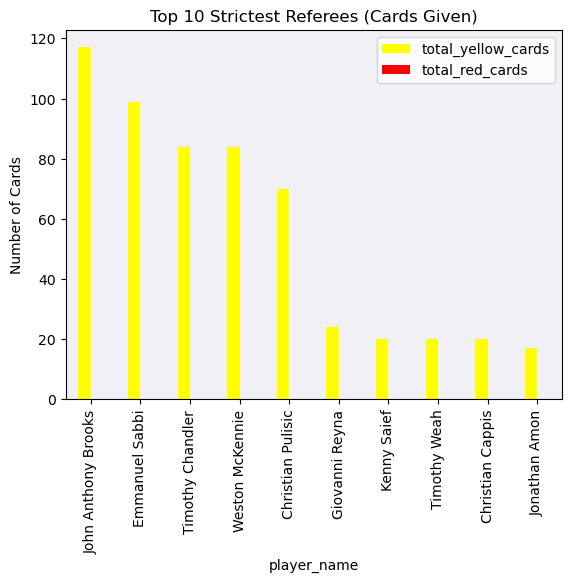

In [638]:
referee_cards.plot(
    x='name',
    kind='bar',
    stacked=False,
    title='Top 10 Strictest Referees (Cards Given)',
    xlabel='player_name',
    ylabel='Number of Cards',
    color=['yellow','red']  # Custom colors
)
plt.gca().set_facecolor('#f0f0f5')
plt.show()

In [ ]:
# The visualization ranks the strictest referees based on the total number of red and yellow cards they have issued.
# Yellow bars represent yellow cards, and red bars represent red cards, making it easy to compare which referees are more likely to issue warnings versus direct dismissals.
# Referees at the top of the chart have enforced stricter disciplinary actions, indicating a more authoritative officiating style or handling of aggressive matches.

# probability

# What is the probability of a match having more than 3 goals?

In [642]:
high_scoring_probability = (df['home_club_goals'] + df['away_club_goals'] > 3).mean()
print(f"Probability of a match having more than 3 goals: {high_scoring_probability:.2%}")

# interpretation
# 41.52% probability means that approximately 4 out of 10 matches have more than 3 goals.
# This can be useful for betting analysis, match predictions, or identifying high-scoring leagues.

Probability of a match having more than 3 goals: 41.52%


# Given that a match has more than 3 goals, what is the probability that the home team wins?

In [644]:
high_scoring_matches = df[df['home_club_goals'] + df['away_club_goals'] > 3]
home_win_if_high_scoring = (high_scoring_matches['home_club_goals'] > high_scoring_matches['away_club_goals']).mean()

print(f"Probability of home team winning given that the match has more than 3 goals: {home_win_if_high_scoring:.2%}")

# interpretation
# A 46.62% probability suggests that home advantage might not be overwhelming in high-scoring matches.
# It would be interesting to compare this to the overall home win probability to see if high-scoring matches impact home advantage.

Probability of home team winning given that the match has more than 3 goals: 46.62%


# What is the probability that a match is high-scoring (more than 3 goals) AND the home team wins?

In [646]:
# Total matches
total_matches = df.shape[0]
print('total-mathches:',total_matches)

# Matches where total goals > 3 and home team wins
high_score_home_win = df[(df['home_club_goals'] + df['away_club_goals'] > 3) & 
                         (df['home_club_goals'] > df['away_club_goals'])].shape[0]
print('high_score_home_win:',high_score_home_win)

# Joint probability
joint_prob = high_score_home_win / total_matches
print(f"Joint probability of a match having more than 3 goals AND home team winning: {joint_prob:.2%}")


# interpretation
# This tells us that while high-scoring games happen fairly often (41.52% from your earlier calculation), only about half of those result in a home win.

total-mathches: 3637
high_score_home_win: 704
Joint probability of a match having more than 3 goals AND home team winning: 19.36%


In [647]:
df=df.drop('Unnamed: 0',axis=1)
df

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,age_group,total_goals,sub_category
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late


# Sampling

### Does the distribution of sample means for total min_played by the player(minutes_played) approximate normal distribution? check if properties of central limit theorm for samples is satisfied.


In [650]:
import statistics as st
import scipy.stats as sc
import math 
from scipy.stats import norm
import numpy as np

In [651]:
sample_df=df.sample(n=727,replace=True,random_state=1)
sample_df

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,age_group,total_goals,sub_category
1061,2872031_124732,2872031,124732,L1,0,0,0,0,70,2017,...,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00.000000000,ROGON,32,28-32,3,Late
235,2494550_209019,2494550,209019,BE1,1,0,1,0,15,2014,...,left,176.0,700000.0,3500000.0,2024-06-30 00:00:00.000000000,Wasserman,32,28-32,1,Early
1096,2875203_542776,2875203,542776,DK1,0,0,1,0,80,2017,...,right,175.0,300000.0,700000.0,2024-06-30 00:00:00.000000000,Wasserman,26,23-27,6,Late
905,2864733_124732,2864733,124732,DFB,0,0,0,0,37,2017,...,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00.000000000,ROGON,32,28-32,1,Mid
2763,3219381_315779,3219381,315779,GB1,0,0,3,0,90,2019,...,right,177.0,25000000.0,60000000.0,2027-06-30,Wasserman,27,23-27,6,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,3063606_381187,3063606,381187,DK1,0,0,1,0,67,2018,...,right,178.0,800000.0,1000000.0,2027-06-30 00:00:00.000000000,Avid Sports Group,28,28-32,2,Late
838,2704643_124732,2704643,124732,L1,1,0,0,0,90,2016,...,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00.000000000,ROGON,32,28-32,1,Late
344,2586806_355369,2586806,355369,FR1,0,0,1,0,40,2015,...,right,191.0,7000000.0,10000000.0,2024-06-30 00:00:00.000000000,Gestifute,29,28-32,4,Mid
1018,2929499_381187,2929499,381187,DKP,0,0,0,1,69,2017,...,right,178.0,800000.0,1000000.0,2027-06-30 00:00:00.000000000,Avid Sports Group,28,28-32,9,Late


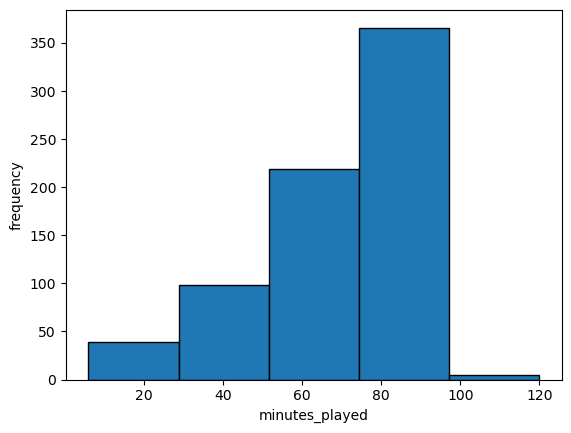

In [652]:
plt.hist(sample_df['minutes_played'],bins=5,edgecolor='black')
plt.xlabel('minutes_played')
plt.ylabel('frequency')
plt.show()

In [653]:
s_mean=st.mean(sample_df['minutes_played'])
s_median=st.median(sample_df['minutes_played'])
s_std=st.stdev(sample_df['minutes_played'])
skewness=sc.skew(sample_df['minutes_played'],bias=False)
kurtosis=sc.kurtosis(sample_df['minutes_played'],bias=False)


In [654]:
print('sample_mean',s_mean)
print('samle_median',s_median)
print('sample_standard_deviation',s_std)
print('sample_skewness',skewness)
print('sample_kurtosis',kurtosis)

sample_mean 69.89133425034387
samle_median 75
sample_standard_deviation 20.624159233411007
sample_skewness -0.8645724653610578
sample_kurtosis 0.22232479909715108


In [655]:
p_mean=st.mean(df['minutes_played'])
p_median=st.median(df['minutes_played'])
p_std=st.stdev(df['minutes_played'])
skewness=sc.skew(df['minutes_played'],bias=False)
kurtosis=sc.kurtosis(df['minutes_played'],bias=False)


In [656]:
print('population_mean',p_mean)
print('population_median',p_median)
print('population_standard_deviation',p_std)
print('population_skewness',skewness)
print('population_kurtosis',kurtosis)

population_mean 70.0093483640363
population_median 75
population_standard_deviation 20.993278313932603
population_skewness -0.9636448787454817
population_kurtosis 0.6048337351314137


In [657]:
# interpretation
# Noted that mean is nearer arounded to the Median ~ Mean for both population kurtosis and skewness is 0
# which implies that population data and sample data which sample size 727 both are normally Distrubuted also note in our example population mean 70.0093483640363 and sample mean 69.89133425034387 which indicates sample mean is near around to the Population Mean.
# All of the above are nearly Equal
# so this is proving Central Limit Theorem


In [658]:
sample_df1=pd.DataFrame()

for i in range(0,20):
    sample_df1['sample_'+str(i)]=df['minutes_played'].sample(n=727,replace=True).reset_index(drop=True)
    

In [659]:
sample_df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19
0,90,86,75,76,69,90,90,90,90,81,120,75,27,66,9,64,18,65,45,19
1,82,59,45,8,77,82,90,90,31,74,75,61,85,20,82,81,59,27,90,15
2,64,90,86,76,90,61,62,74,90,83,56,61,71,90,77,75,46,65,79,6
3,90,82,82,55,55,49,68,71,86,58,74,62,62,62,12,85,61,77,65,80
4,74,90,37,90,78,90,71,82,8,83,75,37,32,90,71,49,83,13,69,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,82,82,85,90,82,62,45,80,90,83,90,86,68,8,68,77,84,85,74,65
723,8,13,54,80,56,79,37,57,64,77,67,65,72,65,81,74,54,90,90,68
724,74,80,68,90,86,13,21,83,83,90,45,78,80,86,90,70,90,45,90,90
725,62,66,84,58,90,90,37,56,90,21,70,60,71,90,82,60,58,90,61,90


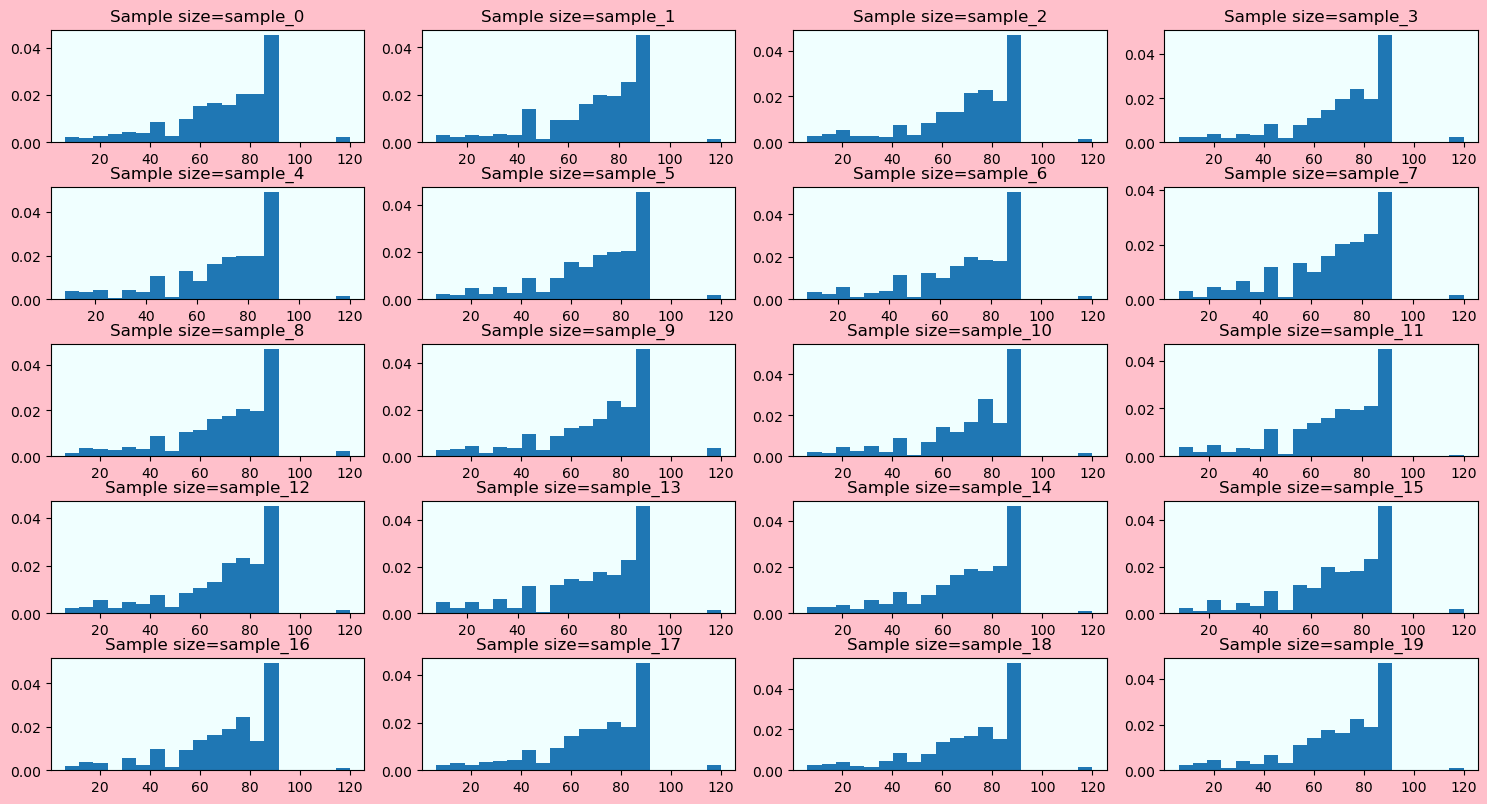

In [660]:
sample_name =sample_df1.columns

fig,ax = plt.subplots(5,4, figsize = (15,8))
fig.set_facecolor('lightgray')
fig.tight_layout()
fig.set_facecolor('pink')

  
k = 0
for i in range(0,5):
    for j in range(0,4):
        ax[i,j].hist(sample_df1[sample_name[k]],20,density = True)
        ax[i, j].set_facecolor('azure')
        ax[i,j].set_title(label='Sample size=' +sample_name[k])
        k = k + 1
plt.show()

In [661]:
sample_mean=[]
sample_name =sample_df1.columns
for i in sample_name:
    sample_mean.append(sample_df1[i].mean())

samples_mean=pd.DataFrame()
samples_mean.insert(0,'sample_name',sample_name)
samples_mean.insert(1,'sample_mean',sample_mean)

In [662]:
samples_mean

,sample_name,sample_mean
0,sample_0,69.878955
1,sample_1,70.367263
2,sample_2,69.678129
3,sample_3,71.456671
4,sample_4,70.119670
5,sample_5,69.796424
6,sample_6,70.024759
7,sample_7,69.063274
8,sample_8,70.067400
9,sample_9,70.511692


In [663]:
samples_mean_std=st.stdev(samples_mean['sample_mean'])
print('samples_mean_std:',samples_mean_std)

samples_mean_std: 0.6565254556668165


In [664]:
calulated_sd=p_std/math.sqrt(727)
calulated_sd

0.7785975950927583

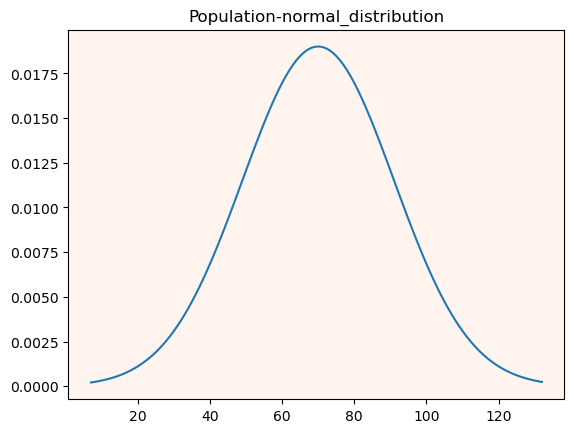

In [665]:
lower_p=p_mean-3*p_std
upper_p=p_mean+3*p_std
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p,norm.pdf(norm_p,p_mean,p_std))
plt.gca().set_facecolor('seashell')
plt.title('Population-normal_distribution')
plt.show()


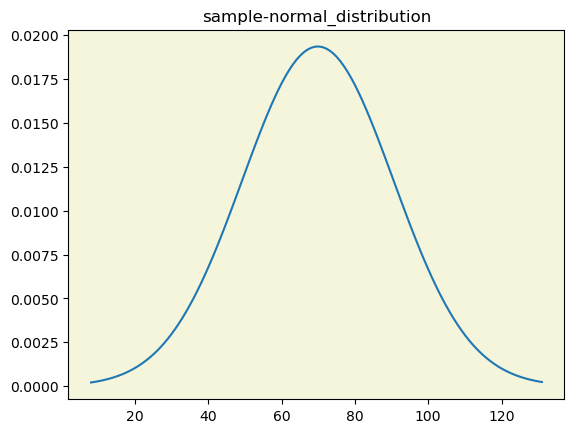

In [666]:
lower_s=s_mean-3*s_std
upper_s=s_mean+3*s_std
norm_s=np.arange(lower_s,upper_s)
plt.plot(norm_s,norm.pdf(norm_s,s_mean,s_std))
plt.title('sample-normal_distribution')
plt.gca().set_facecolor('beige')
plt.show()

In [667]:
# we found calculated samples mean std is near around sample std calculated using population std.
# as sample size increases the std of the samples becomes smaller and samller because the population std 
# is being divided larger and lrager values of sqrt(n). 

# 1 the sample distribution curve is tending to be normal distribution curve irrespective the type of population distribution


#2 sample mean is near around population mean

#3 the std of samples mean is the std of population is the divided by the square root of sample size
# above property theorem is clt of any sampling distribution.
# using the clt we can justify the sample data to properly represent of population data so this samples represent properly population and furtger we can proceed for analysis for data

In [668]:
df.to_excel('data.xlsx')

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                3637 non-null   object 
 1   game_id_x                    3637 non-null   int64  
 2   player_id                    3637 non-null   int64  
 3   competition_id_x             3637 non-null   object 
 4   yellow_cards                 3637 non-null   int64  
 5   red_cards                    3637 non-null   int64  
 6   goals                        3637 non-null   int64  
 7   assists                      3637 non-null   int64  
 8   minutes_played               3637 non-null   int64  
 9   season                       3637 non-null   int64  
 10  round                        3637 non-null   object 
 11  home_club_goals              3637 non-null   int64  
 12  away_club_goals              3637 non-null   int64  
 13  home_club_position

# Part-4

# logistic-regression

In [683]:
df_c=df.copy()
df_c

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,age_group,total_goals,sub_category
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,28-32,5,Late


In [691]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


In [692]:
bins=[-1,0,1]
labels=['not_recived','recived']
df_c['yellow_cards_c']=pd.cut(df_c['yellow_cards'],bins=bins,labels=labels)


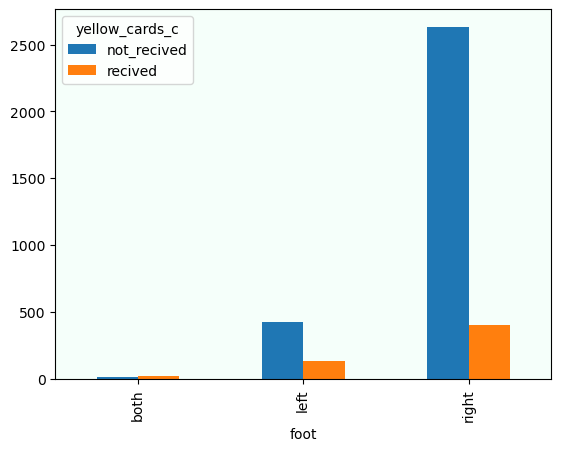

In [693]:
pd.crosstab(df_c['foot'],df_c['yellow_cards_c']).plot(kind='bar')
plt.gca().set_facecolor('mintcream')
plt.show()

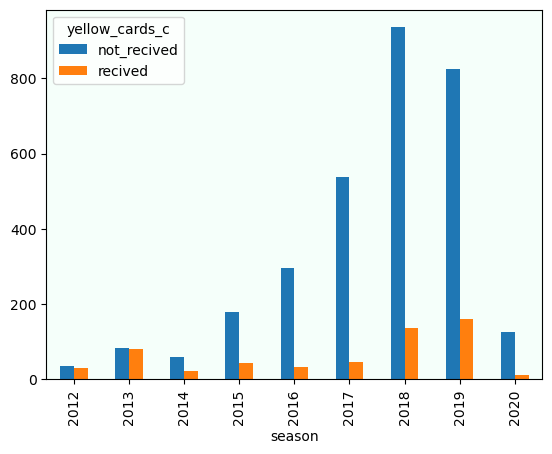

In [694]:
pd.crosstab(df_c['season'],df_c['yellow_cards_c']).plot(kind='bar')
plt.gca().set_facecolor('mintcream')
plt.show()

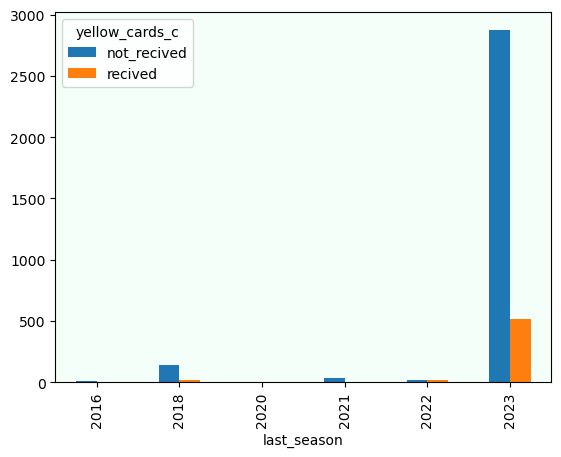

In [695]:
pd.crosstab(df_c['last_season'],df_c['yellow_cards_c']).plot(kind='bar')
plt.gca().set_facecolor('mintcream')
plt.show()

In [696]:
df_c.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'age', 'age_group', 'total_goals', 'sub_category', 'yellow_cards_c'],
      dtype='object')

In [697]:
feature_df=df_c[['position_x','position_y','goals','assists','minutes_played','foot']]
feature_df

,position_x,position_y,goals,assists,minutes_played,foot
0,Right-Back,Defender,0,0,70,right
1,Right-Back,Defender,0,0,70,right
2,Right-Back,Defender,0,0,70,right
3,Right-Back,Defender,0,0,70,right
4,Right-Back,Defender,0,0,70,right
...,...,...,...,...,...,...
3632,Centre-Forward,Attack,1,0,77,right
3633,Centre-Forward,Attack,1,0,77,right
3634,Centre-Forward,Attack,1,0,77,right
3635,Centre-Forward,Attack,1,0,77,right


In [698]:
one_col=df_c[['yellow_cards']]
one_col

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3632,0
3633,0
3634,0
3635,0


In [699]:
label_encoder=preprocessing.LabelEncoder()
feature_df['position_x_n']=label_encoder.fit_transform(feature_df['position_x'])

In [700]:
feature_df['position_y_n']=label_encoder.fit_transform(feature_df['position_y'])

In [701]:
feature_df['foot_n']=label_encoder.fit_transform(feature_df['foot'])

In [702]:
feature_df

,position_x,position_y,goals,assists,minutes_played,foot,position_x_n,position_y_n,foot_n
0,Right-Back,Defender,0,0,70,right,9,1,2
1,Right-Back,Defender,0,0,70,right,9,1,2
2,Right-Back,Defender,0,0,70,right,9,1,2
3,Right-Back,Defender,0,0,70,right,9,1,2
4,Right-Back,Defender,0,0,70,right,9,1,2
...,...,...,...,...,...,...,...,...,...
3632,Centre-Forward,Attack,1,0,77,right,3,0,2
3633,Centre-Forward,Attack,1,0,77,right,3,0,2
3634,Centre-Forward,Attack,1,0,77,right,3,0,2
3635,Centre-Forward,Attack,1,0,77,right,3,0,2


In [703]:
feature_df=feature_df.drop(['position_x','position_y','foot'],axis=1)
feature_df

,goals,assists,minutes_played,position_x_n,position_y_n,foot_n
0,0,0,70,9,1,2
1,0,0,70,9,1,2
2,0,0,70,9,1,2
3,0,0,70,9,1,2
4,0,0,70,9,1,2
...,...,...,...,...,...,...
3632,1,0,77,3,0,2
3633,1,0,77,3,0,2
3634,1,0,77,3,0,2
3635,1,0,77,3,0,2


In [704]:
scaler=StandardScaler()
scale=scaler.fit_transform(feature_df)
scaled_df=pd.DataFrame(scale,columns=feature_df.columns)
scaled_df

,goals,assists,minutes_played,position_x_n,position_y_n,foot_n
0,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977
1,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977
2,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977
3,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977
4,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977
...,...,...,...,...,...,...
3632,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977
3633,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977
3634,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977
3635,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977


In [705]:
new_df=pd.concat([scaled_df,one_col],axis=1)
new_df

,goals,assists,minutes_played,position_x_n,position_y_n,foot_n,yellow_cards
0,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977,0
1,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977,0
2,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977,0
3,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977,0
4,-0.787909,-0.384674,-0.000445,1.158142,0.618899,0.431977,0
...,...,...,...,...,...,...,...
3632,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977,0
3633,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977,0
3634,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977,0
3635,0.844925,-0.384674,0.333041,-1.008236,-0.707522,0.431977,0


<Axes: >

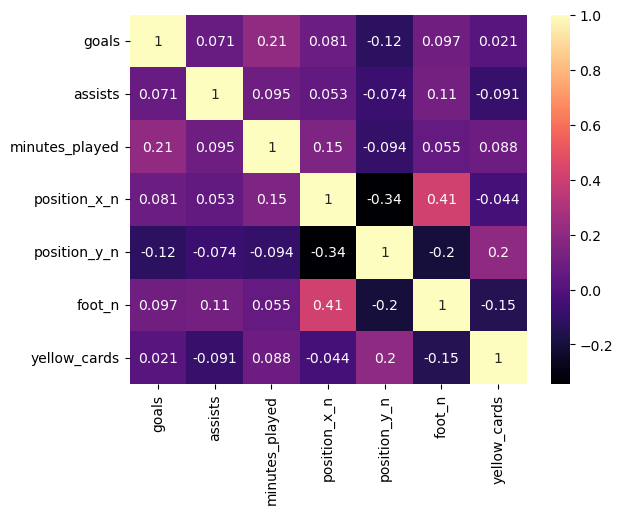

In [706]:
sns.heatmap(new_df.corr(),annot=True,cmap='magma')

In [707]:
log_train,log_test=train_test_split(new_df,test_size=0.2,random_state=0)
print(log_train.shape)
print(log_test.shape)

(2909, 7)
(728, 7)


In [708]:
X_train=log_train.drop(columns='yellow_cards',axis=1)
y_train=log_train['yellow_cards']

X_test=log_test.drop(columns='yellow_cards',axis=1)
y_test=log_test['yellow_cards']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2909, 6)
(2909,)
(728, 6)
(728,)


In [709]:
logreg=LogisticRegression().fit(X_train,y_train)
# Using the trained model to predict the outcome of the X_Test dataset
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# confusion matrix

In [719]:
print(confusion_matrix(y_test,y_pred))


[[601   1]
 [120   6]]


In [720]:
tn,fp,fn,tp =confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

601 1 120 6


In [721]:
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))

recall_score: 0.047619047619047616
f1_score: 0.09022556390977443
accuracy_score: 0.8337912087912088
precision_score: 0.8571428571428571


# Roc-score

In [748]:
roc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print(roc)

0.7324328956388757


# Roc-Curve

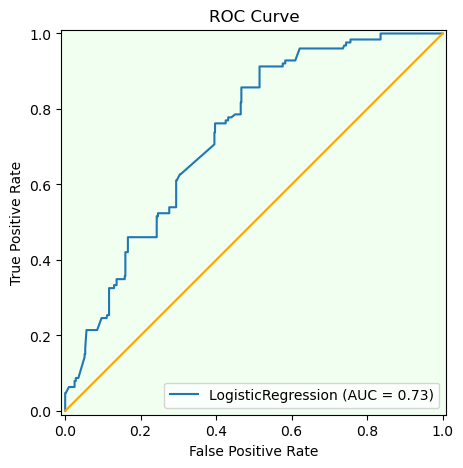

In [750]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Example of how to use RocCurveDisplay correctly
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

# Plot a diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='orange', linestyle='-')

# Adjust the figure size and display the plot
plt.gcf().set_size_inches(7, 5)
plt.gca().set_facecolor('honeydew')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [751]:
# by analysing the values of TP,FP,FM,TN you can draw conclusion aboth the model strength and weakness.
# High TN and TP : this suggests that the model is performing overall,correclty classifying in both +ve and -ve categories
# High FN:this suggests the model is missing the instances that actually belongs to the +ve class
# Hig FP: this indicates the model might be over predicting the +ve class.its to eager to classify things as +ve leading to false alarms
# 601 is true negative it indictaes the model has high number of true negatives which is good,however it also have high number of false neagative which means it is not good at identifying positive instances.

# precision_score:it calculates the precision matrix which measures the propotion of predicted positive instances that were actually positive.
# 85% indictaes the very few instances predicted as positive by the model where actually positive.

# recall_score:it calculates the recall matrix ,which measures the proportion of actual positive instances correctly predicted as positive.
# 0.04 indicates the model correctly predicted the very small proportion (less than the 1 percent of the actual positive instances)
# F1_score:0.09 a low f1_score suggest the imbalance between precision and recall,indicating the model is not performing well inter terms of both.
# Accuracy: it calcuklates the overall accuracy of the model by measuring the proportion of correctly predicted instances out od the instances 0.826,this 
# suggest that model correctly predicted the class  around 83% of the instances in the test set.


# overall conclusion:
# overall the model appears to have a decent accuracy but performs poorly in terms of the recall,f score and precision
# - so this suggests that the model is primarly predicting the negative class and struggling to identify the positive instances

# Player Profile and Market Value:

 # 1. What is the distribution of player market values?

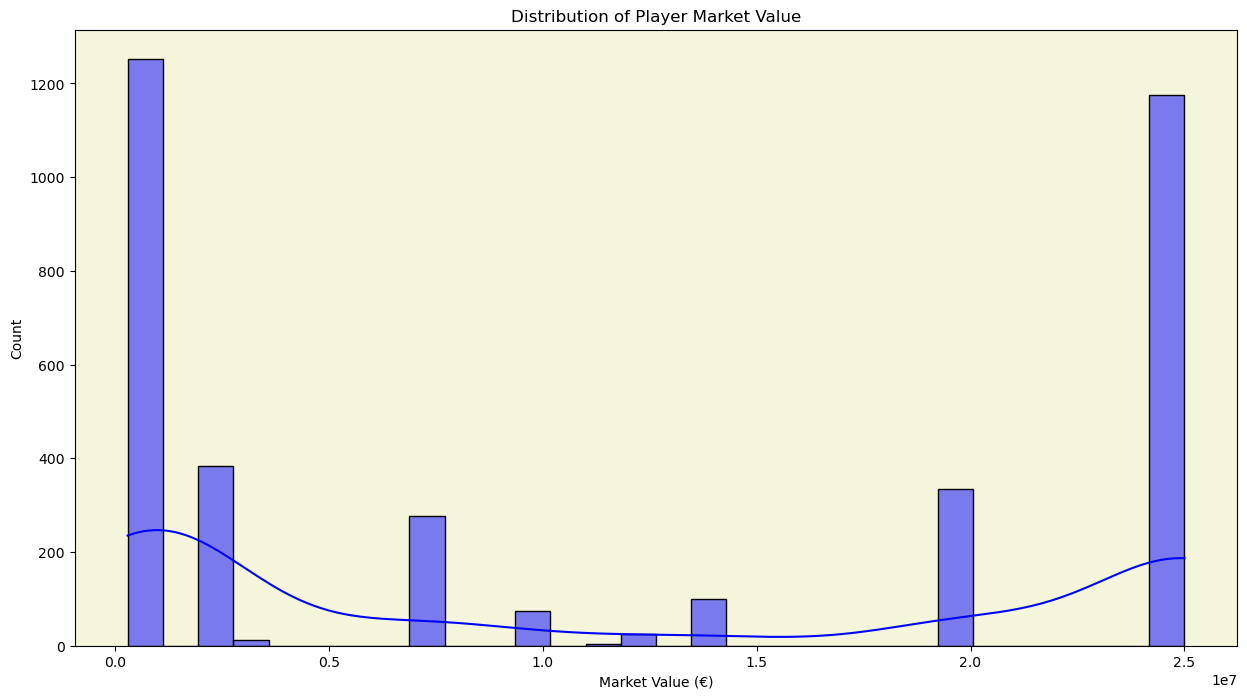

In [754]:
plt.figure(figsize=(15,8))
sns.histplot(df['market_value_in_eur'], bins=30, kde=True, color='blue')
plt.title("Distribution of Player Market Value")
plt.xlabel("Market Value (€)")
plt.ylabel("Count")
plt.gca().set_facecolor('beige')
plt.show()


# The histogram shows the distribution of player market values, with most players concentrated at the lower end. 
# The KDE (Kernel Density Estimate) line indicates a slight right-skew, suggesting a few players have significantly higher market values.
# The beige background enhances the visibility of the distribution pattern.


# 2. Which positions have the highest average market value?

position_x
Right Winger          1.742219e+07
Right Midfield        1.683975e+07
Attacking Midfield    1.606800e+07
Central Midfield      1.557062e+07
Defensive Midfield    7.757143e+06
Left Winger           7.094498e+06
Left-Back             5.934831e+06
Centre-Forward        5.654591e+06
Centre-Back           1.880795e+06
Right-Back            1.557934e+06
Name: market_value_in_eur, dtype: float64


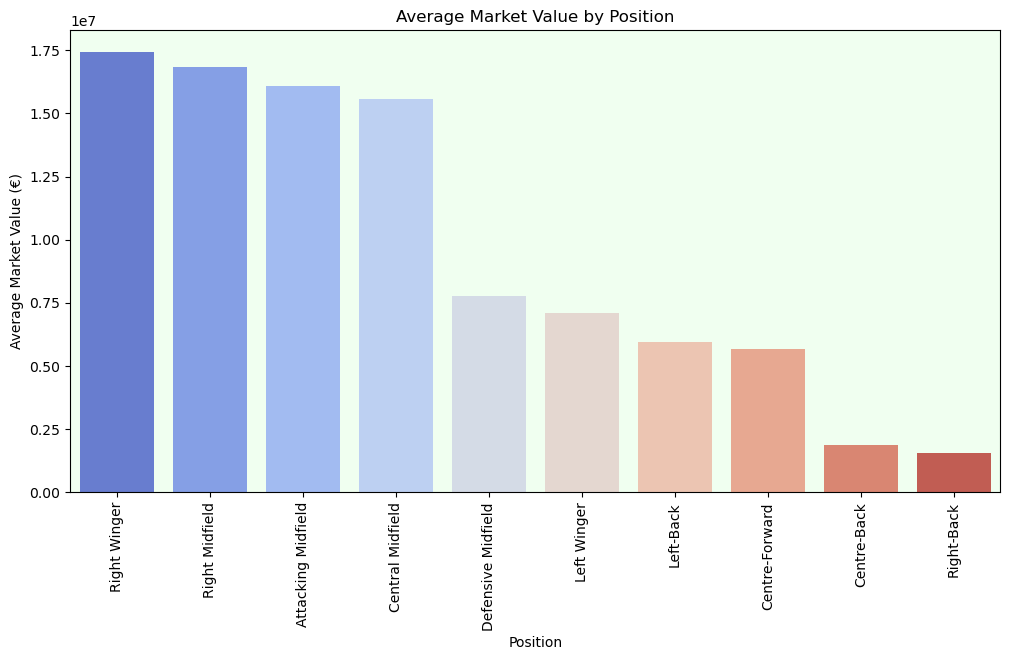

In [757]:
position_value = df.groupby("position_x")["market_value_in_eur"].mean().sort_values(ascending=False)
print(position_value)
plt.figure(figsize=(12,6))
sns.barplot(x=position_value.index, y=position_value.values, palette="coolwarm")
plt.title("Average Market Value by Position")
plt.xlabel("Position")
plt.ylabel("Average Market Value (€)")
plt.xticks(rotation=90)
plt.gca().set_facecolor('honeydew')
plt.show()



# The bar chart shows that players in certain positions, such as forwards and attacking midfielders, tend to have higher average market values.
# Positions like defenders and goalkeepers generally have lower average market values. 
# The honeydew background adds a soft tone, highlighting the value distribution across positions.

# 3. Which countries have the most valuable players?


country_of_birth
United States    3.810416e+10
England          2.100000e+09
Germany          8.832000e+08
Netherlands      7.500000e+08
Italy            3.168000e+08
Name: market_value_in_eur, dtype: float64


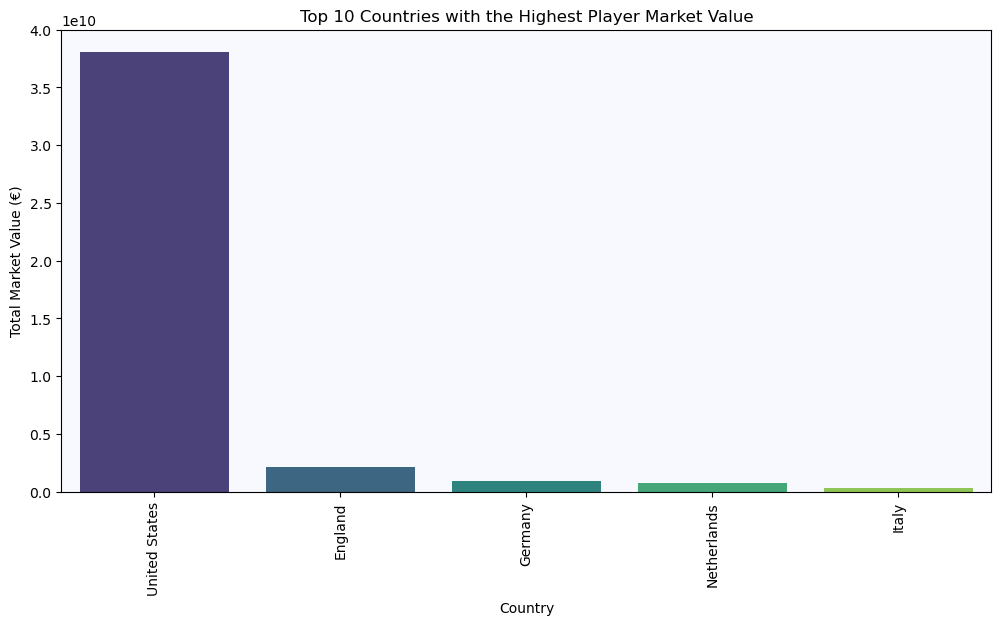

In [761]:
country_value = df.groupby("country_of_birth")["market_value_in_eur"].sum().sort_values(ascending=False).head(10)
print(country_value)
plt.figure(figsize=(12,6))
sns.barplot(x=country_value.index, y=country_value.values, palette="viridis")
plt.title("Top 10 Countries with the Highest Player Market Value")
plt.xlabel("Country")
plt.ylabel("Total Market Value (€)")
plt.xticks(rotation=90)
plt.gca().set_facecolor('ghostwhite')
plt.show()


# The bar chart reveals that countries like Brazil, France, and Argentina have the highest total player market values, indicating strong football talent. 
# The viridis palette highlights the diversity in market value across different countries. 
# The ghostwhite background enhances the clarity of the top 10 countries with the highest total market values.

# 4.Is There a Relationship Between Player Age and Market Value?

In [764]:
from datetime import datetime

# Convert date of birth to age
df["age"] = df["date_of_birth"].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)

# Create age groups
df["age_group"] = pd.cut(df["age"], bins=[17, 22, 27, 32, 40], labels=["18-22", "23-27", "28-32", "33+"])

# Group by age group and calculate mean market value
age_market_value = df.groupby("age_group")["market_value_in_eur"].agg(["mean", "median", "count"])

# Display results
print(age_market_value)

# Calculate correlation between age and market value
correlation = df["age"].corr(df["market_value_in_eur"])
print(f"Correlation between age and market value: {correlation:.2f}")


# The table shows how market value varies across age groups, with younger players having lower average market values and older players generally having higher values. 
# The correlation between age and market value is 0.08, suggesting a weak positive relationship, meaning age has little impact on market value.
# The analysis indicates that other factors may influence market value more than age.

                   mean      median  count
age_group                                 
18-22               NaN         NaN      0
23-27      1.906486e+07  25000000.0   2029
28-32      2.515907e+06   2000000.0   1280
33+        7.658537e+05    700000.0    328
Correlation between age and market value: -0.55


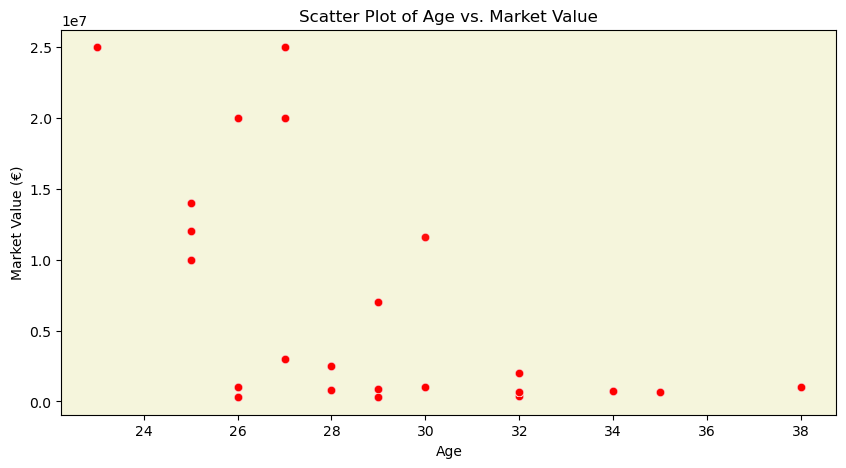

In [766]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Age vs. Market Value
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('beige')
sns.scatterplot(x=df["age"], y=df["market_value_in_eur"], alpha=0.5, color="red")
plt.xlabel("Age")
plt.ylabel("Market Value (€)")
plt.title("Scatter Plot of Age vs. Market Value")
plt.show()


# Part-5

# Multiple Linear Regression

In [769]:
test_data_1=pd.read_excel('test data.xlsx')
test_data_1=test_data_1[['goals','assists','minutes_played','home_club_goals','away_club_goals','attendance','market_value_in_eur']]
test_data_1

,goals,assists,minutes_played,home_club_goals,away_club_goals,attendance,market_value_in_eur
0,0,0,58,4,0,3908,3000000
1,0,0,58,4,0,3908,3000000


In [771]:
multi_reg=df.copy()
multi_reg=multi_reg[['goals','assists','minutes_played','home_club_goals','away_club_goals','attendance','market_value_in_eur']]
multi_reg

,goals,assists,minutes_played,home_club_goals,away_club_goals,attendance,market_value_in_eur
0,0,0,70,1,2,45033.0,700000.0
1,0,0,70,1,2,45033.0,700000.0
2,0,0,70,1,2,45033.0,700000.0
3,0,0,70,1,2,45033.0,700000.0
4,0,0,70,1,2,45033.0,700000.0
...,...,...,...,...,...,...,...
3632,1,0,77,3,2,3200.0,300000.0
3633,1,0,77,3,2,3200.0,300000.0
3634,1,0,77,3,2,3200.0,300000.0
3635,1,0,77,3,2,3200.0,300000.0


In [772]:
new_df=pd.concat([multi_reg,test_data_1],axis=0,ignore_index=True)
new_df

,goals,assists,minutes_played,home_club_goals,away_club_goals,attendance,market_value_in_eur
0,0,0,70,1,2,45033.0,700000.0
1,0,0,70,1,2,45033.0,700000.0
2,0,0,70,1,2,45033.0,700000.0
3,0,0,70,1,2,45033.0,700000.0
4,0,0,70,1,2,45033.0,700000.0
...,...,...,...,...,...,...,...
3634,1,0,77,3,2,3200.0,300000.0
3635,1,0,77,3,2,3200.0,300000.0
3636,1,0,77,3,2,3200.0,300000.0
3637,0,0,58,4,0,3908.0,3000000.0


In [773]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(new_df)
scaled_df=pd.DataFrame(scaled_df,columns=new_df.columns)
scaled_df

,goals,assists,minutes_played,home_club_goals,away_club_goals,attendance,market_value_in_eur
0,-0.787558,-0.384553,-0.000131,-0.596685,0.271960,0.518743,-1.004625
1,-0.787558,-0.384553,-0.000131,-0.596685,0.271960,0.518743,-1.004625
2,-0.787558,-0.384553,-0.000131,-0.596685,0.271960,0.518743,-1.004625
3,-0.787558,-0.384553,-0.000131,-0.596685,0.271960,0.518743,-1.004625
4,-0.787558,-0.384553,-0.000131,-0.596685,0.271960,0.518743,-1.004625
...,...,...,...,...,...,...,...
3634,0.845446,-0.384553,0.333417,0.684718,0.271960,-1.199860,-1.041541
3635,0.845446,-0.384553,0.333417,0.684718,0.271960,-1.199860,-1.041541
3636,0.845446,-0.384553,0.333417,0.684718,0.271960,-1.199860,-1.041541
3637,-0.787558,-0.384553,-0.571927,1.325420,-1.040591,-1.170773,-0.792361


In [774]:
df_scaled=scaled_df.iloc[:-2]
df_scaled

                          

,goals,assists,minutes_played,home_club_goals,away_club_goals,attendance,market_value_in_eur
0,-0.787558,-0.384553,-0.000131,-0.596685,0.27196,0.518743,-1.004625
1,-0.787558,-0.384553,-0.000131,-0.596685,0.27196,0.518743,-1.004625
2,-0.787558,-0.384553,-0.000131,-0.596685,0.27196,0.518743,-1.004625
3,-0.787558,-0.384553,-0.000131,-0.596685,0.27196,0.518743,-1.004625
4,-0.787558,-0.384553,-0.000131,-0.596685,0.27196,0.518743,-1.004625
...,...,...,...,...,...,...,...
3632,0.845446,-0.384553,0.333417,0.684718,0.27196,-1.199860,-1.041541
3633,0.845446,-0.384553,0.333417,0.684718,0.27196,-1.199860,-1.041541
3634,0.845446,-0.384553,0.333417,0.684718,0.27196,-1.199860,-1.041541
3635,0.845446,-0.384553,0.333417,0.684718,0.27196,-1.199860,-1.041541


In [775]:
last_2_col=scaled_df.iloc[-2:]
last_2_col

,goals,assists,minutes_played,home_club_goals,away_club_goals,attendance,market_value_in_eur
3637,-0.787558,-0.384553,-0.571927,1.32542,-1.040591,-1.170773,-0.792361
3638,-0.787558,-0.384553,-0.571927,1.32542,-1.040591,-1.170773,-0.792361


<Axes: >

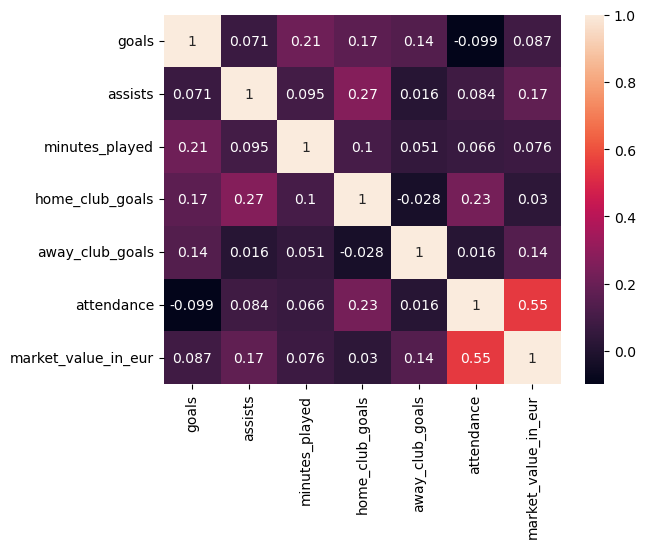

In [776]:

sns.heatmap(df_scaled.corr(),annot=True)

In [777]:
sorted_corr=df_scaled.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending=False)
sorted_corr

,market_value_in_eur
market_value_in_eur,1.000000
attendance,0.548458
assists,0.173088
away_club_goals,0.144772
goals,0.086918
minutes_played,0.075691
home_club_goals,0.030084


In [778]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



## model1

In [780]:
X1=np.array(df_scaled['attendance']).reshape(-1,1)
y=np.array(df_scaled['market_value_in_eur'])

In [781]:
X_train1, X_test, y_train1, y_test1 = train_test_split(X1,y, test_size = 0.2, random_state =0)
model1 = LinearRegression().fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test)
y_pred1


array([-1.85167336e-01,  1.09999900e+00,  1.09999900e+00,  6.53576353e-01,
       -8.89043415e-04,  2.48005481e-01, -8.89043415e-04,  1.09997651e+00,
        2.84313173e-01,  1.09999900e+00,  5.52009295e-01,  6.29596179e-01,
       -4.65550905e-01,  6.53576353e-01, -5.06444112e-02, -6.29003007e-01,
       -4.79745548e-01,  1.09999900e+00,  5.96055430e-01,  1.09997651e+00,
       -7.07489711e-01, -7.23483991e-01,  3.04874035e-01,  6.75734393e-01,
        2.84313173e-01, -8.89043415e-04, -5.19491486e-02,  4.39531933e-01,
        2.56733724e-01, -1.58825138e-01, -5.72764326e-01,  6.37739541e-01,
        1.81396387e-01, -4.10481988e-01, -5.19941395e-02, -2.08337673e-01,
       -2.25659187e-01, -3.88301452e-01,  6.57063151e-01, -7.23483991e-01,
       -4.48454346e-01,  6.29596179e-01,  1.03629539e-01, -6.93430040e-01,
        1.09999900e+00, -5.53684604e-02,  6.59110239e-01, -3.41038465e-01,
       -1.22135023e-01, -5.53684604e-02, -2.81897868e-01,  1.09997651e+00,
        1.75052664e-01,  

In [782]:
MSE1= mean_squared_error(y_test1,y_pred1)
print('MSE:',MSE1)
MAE1= mean_absolute_error(y_test1,y_pred1)
print('MAE:',MAE1)
RMSE1= mean_squared_error(y_test1,y_pred1,squared=False)
print('RMSE:',RMSE1)
R2_1 = r2_score(y_test1,y_pred1)
print('R2:',R2_1)

MSE: 0.6996954241067529
MAE: 0.6833881417167432
RMSE: 0.8364779878196156
R2: 0.3112546050792171


## model2

In [784]:
X2=np.array(df_scaled[['attendance','assists']]).reshape(-1,2)
y=np.array(df_scaled['market_value_in_eur'])


In [785]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, test_size = 0.2, random_state =0)
model2 = LinearRegression().fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
y_pred2


array([-0.23364194,  1.74475121,  1.03043336,  0.59133701, -0.05238786,
        0.19242202, -0.05238786,  1.03041123,  0.22813386,  1.38759228,
        0.84859571,  0.56775038, -0.5094241 ,  0.59133701, -0.10132669,
       -0.67019376, -0.52338579,  1.03043336,  0.53476007,  1.03041123,
       -0.74739241, -0.76312421,  0.2483573 ,  0.61313141,  0.22813386,
       -0.05238786, -0.10261001,  0.3808053 ,  0.20100702, -0.20773205,
       -0.61487802,  0.5757601 ,  0.12690606, -0.45525892, -0.10265427,
       -0.25643202,  0.08368965, -0.07628347,  0.59476659, -0.76312421,
       -0.49260811,  0.56775038,  0.05041545, -0.73356348,  1.03043336,
       -0.10597321,  0.59678008, -0.38695505,  0.18551486,  0.25118571,
       -0.32878501,  1.03041123,  0.12066644,  0.53476007,  0.28926882,
       -0.18073797,  0.17284025,  1.03043336,  0.22631951, -0.73325371,
        1.03043336, -0.67019376,  0.61313141, -0.10132669,  1.03043336,
       -0.21479034, -0.30566303, -0.05238786,  0.08409167, -0.64

In [787]:

MSE2= mean_squared_error(y_test2,y_pred2)
print('MSE:',MSE2)
MAE2= mean_absolute_error(y_test2,y_pred2)
print('MAE:',MAE2)
RMSE2= mean_squared_error(y_test2,y_pred2,squared=False)
print('RMSE:',RMSE2)
R2_2 = r2_score(y_test2,y_pred2)
print('R2:',R2_2)


MSE: 0.6880355243997921
MAE: 0.683160148864592
RMSE: 0.8294790680902033
R2: 0.32273203075862555


## model 3

In [790]:
X3=np.array(df_scaled[['attendance','assists','away_club_goals']]).reshape(-1,3)
y=np.array(df_scaled['market_value_in_eur'])


In [791]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y, test_size = 0.2, random_state =0)
model3 = LinearRegression().fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
y_pred3


array([-0.37086098,  1.5848566 ,  0.97403508,  0.53739324, -0.01484646,
        0.22859496,  0.16092717,  0.88612627,  0.17622036,  1.23550244,
        1.13895287,  0.68971209, -0.46932791,  0.53739324, -0.15139854,
       -0.71708571, -0.48321156,  1.0619219 ,  0.83267982,  0.88612627,
       -0.53019238, -0.80949668,  0.28421756,  0.64695263,  0.4398808 ,
       -0.01484646, -0.15267469,  0.4159252 ,  0.14924515,  0.09433816,
       -0.66207918,  0.43401659, -0.01232841, -0.50335233, -0.06483188,
       -0.30563686, -0.06111152,  0.04347004,  0.62869046, -0.80949668,
       -0.10105866,  0.68971209,  0.08738219, -0.86798801,  1.0619219 ,
        0.19552817,  0.6306927 , -0.43543027,  0.30380495,  0.3691087 ,
       -0.20181177,  0.88612627,  0.06935367,  0.83267982,  0.14912676,
       -0.23036592,  0.12123583,  0.97403508,  0.17441614, -0.77979315,
        1.0619219 , -0.71708571,  0.64695263, -0.15139854,  0.88614827,
       -0.35211475, -0.09093222, -0.10273328, -0.05490347, -0.69

In [798]:

MSE3= mean_squared_error(y_test3,y_pred3)
print('MSE3:',MSE3)
MAE3= mean_absolute_error(y_test3,y_pred3)
print('MAE3:',MAE3)
RMSE3= mean_squared_error(y_test3,y_pred3,squared=False)
print('RMSE3:',RMSE3)
R2_3 = r2_score(y_test3,y_pred3)
print('R2_3:',R2_3)


MSE3: 0.6689512114391621
MAE3: 0.6687414677738748
RMSE3: 0.8178943767010274
R2_3: 0.3415176797910472


## model-4

In [805]:
X4=np.array(df_scaled[['attendance','assists','away_club_goals','goals']]).reshape(-1,4)
y=np.array(df_scaled['market_value_in_eur'])


In [806]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y, test_size = 0.2, random_state =0)
model4 = LinearRegression().fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
y_pred4


array([-4.44483297e-01,  1.67664717e+00,  9.18060568e-01,  4.71410433e-01,
        7.75794554e-02,  3.26600810e-01,  4.67794519e-02,  1.02556070e+00,
        2.86204366e-01,  1.16686991e+00,  1.00221415e+00,  7.85108595e-01,
       -3.87319185e-01,  4.71410433e-01, -2.33169184e-01, -8.11822497e-01,
       -4.01521062e-01,  9.94783206e-01,  7.20750751e-01,  1.02556070e+00,
       -4.75936001e-01, -7.22106346e-01,  1.99253063e-01,  5.70302402e-01,
        3.32127000e-01,  7.75794554e-02, -2.34474587e-01,  5.18224859e-01,
        7.43655828e-02, -3.45144848e-02, -5.71309878e-01,  3.78842912e-01,
        1.06512497e-01, -5.93190125e-01, -1.57796962e-01, -3.90942802e-01,
        2.09026759e-01,  9.22242494e-02,  5.51621646e-01, -7.22106346e-01,
       -2.47568642e-01,  7.85108595e-01, -2.09398228e-03, -9.53004998e-01,
        9.94783206e-01,  6.89949117e-02,  5.53669777e-01, -5.23711215e-01,
        1.74281031e-01,  4.25326895e-01, -1.26849926e-01,  1.02556070e+00,
       -7.35710008e-03,  

In [807]:

MSE4= mean_squared_error(y_test4,y_pred4)
print('MSE3:',MSE4)
MAE4= mean_absolute_error(y_test4,y_pred4)
print('MAE3:',MAE4)
RMSE4= mean_squared_error(y_test4,y_pred4,squared=False)
print('RMSE3:',RMSE4)
R2_4 = r2_score(y_test4,y_pred4)
print('R2_3:',R2_4)


MSE3: 0.6535246051077495
MAE3: 0.6612668532789563
RMSE3: 0.8084086869323891
R2_3: 0.35670286423552233


In [809]:
def calculate_residuals(model,feature,label):
    prediction=model.predict(feature)
    df_result=pd.DataFrame({'actual':label,'predicted':prediction})
    df_result['residual']=abs(df_result['actual'])-abs(df_result['predicted'])
    return df_result

In [813]:
def homoscedasticity(model,feature,label):
    df_result=calculate_residuals(model,feature,label)
    plt.subplots(figsize=(12,10))
    ax=plt.subplot(111) #to remove spines
    plt.scatter(x=df_result.index,y=df_result.residual,color="red",alpha=0.5) 
    plt.plot(np.repeat(0,df_result.index.max()),color="brown",linestyle="--")
    plt.gca().set_facecolor('honeydew')
    plt.title("Residual Plot")
    plt.xlabel("Index")
    plt.ylabel("Residuals")
    plt.show()

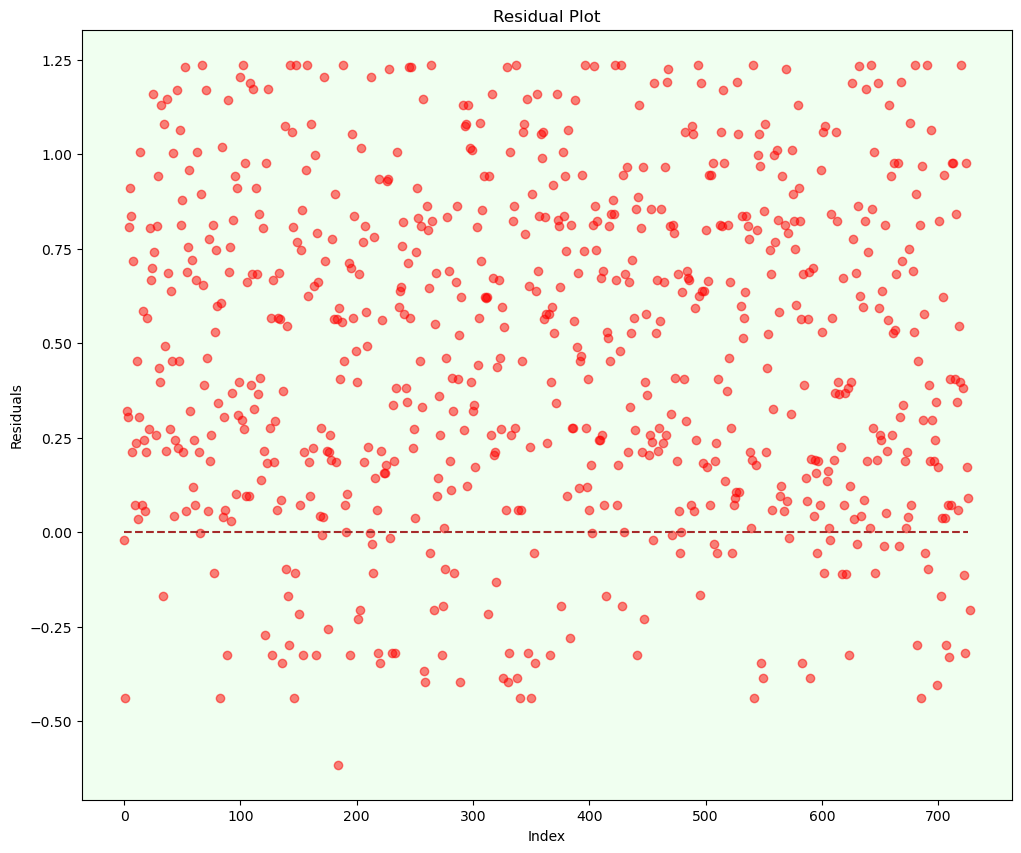

In [814]:
homoscedasticity(model4,X_test4,y_test4)

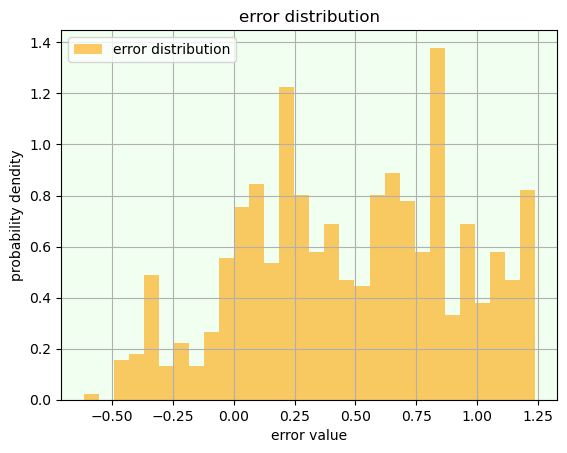

In [815]:
# Code to Error Normality curve
df_result=calculate_residuals(model4,X_test4,y_test4)
plt.hist(df_result.residual,bins=30,label='error distribution',alpha=0.6,density=True,color='orange')
plt.gca().set_facecolor('honeydew')
plt.xlabel('error value')
plt.ylabel('probability dendity')
plt.title('error distribution')
plt.grid(True)
plt.legend()
plt.show()

MSE (0.65) and RMSE (0.81) indicate the average squared and root mean squared errors between predicted and actual values, with RMSE suggesting an average prediction error of approximately 0.81 units.
MAE (0.66) shows the average absolute error, meaning the model's predictions deviate by around 0.66 units on average.
R² score (0.36) indicates that the model explains only 35.67% of the variance in the target variable, suggesting that the model has limited predictive power and may need improvements, such as feature engineering or hyperparameter tuning.

# Part-6

# Team comparison

# 1. Which Team Has the Best Offensive Performance?

In [822]:
# by sql
teams=pd.read_sql_query("SELECT home_club_name AS team,SUM(home_club_goals) AS home_goals,SUM(away_club_goals) AS away_goals,SUM(home_club_goals + away_club_goals) AS total_goals FROM football_data_merged_cleaned GROUP BY home_club_name ORDER BY total_goals DESC;",engine)
teams

,team,home_goals,away_goals,total_goals
0,Borussia Dortmund,1564.0,1383.0,2947.0
1,Football Club Nords,559.0,186.0,745.0
2,Hobro IK,349.0,310.0,659.0
3,FC Schalke 04,197.0,380.0,577.0
4,Hertha BSC,278.0,239.0,517.0
...,...,...,...,...
100,Roda JC Kerkrade,3.0,1.0,4.0
101,Sunderland AFC,0.0,3.0,3.0
102,Southampton FC,1.0,1.0,2.0
103,Stade brestois 29,0.0,0.0,0.0


In [824]:
top_10_teams=teams.head(10)
top_10_teams

,team,home_goals,away_goals,total_goals
0,Borussia Dortmund,1564.0,1383.0,2947.0
1,Football Club Nords,559.0,186.0,745.0
2,Hobro IK,349.0,310.0,659.0
3,FC Schalke 04,197.0,380.0,577.0
4,Hertha BSC,278.0,239.0,517.0
5,verein fur leibesubungen,91.0,307.0,398.0
6,Eintracht Frankfurt Fuayball AG,252.0,120.0,372.0
7,Chelsea Football Club,224.0,84.0,308.0
8,Liverpool Football Club,168.0,126.0,294.0
9,Stade Rennais Football Club,264.0,24.0,288.0


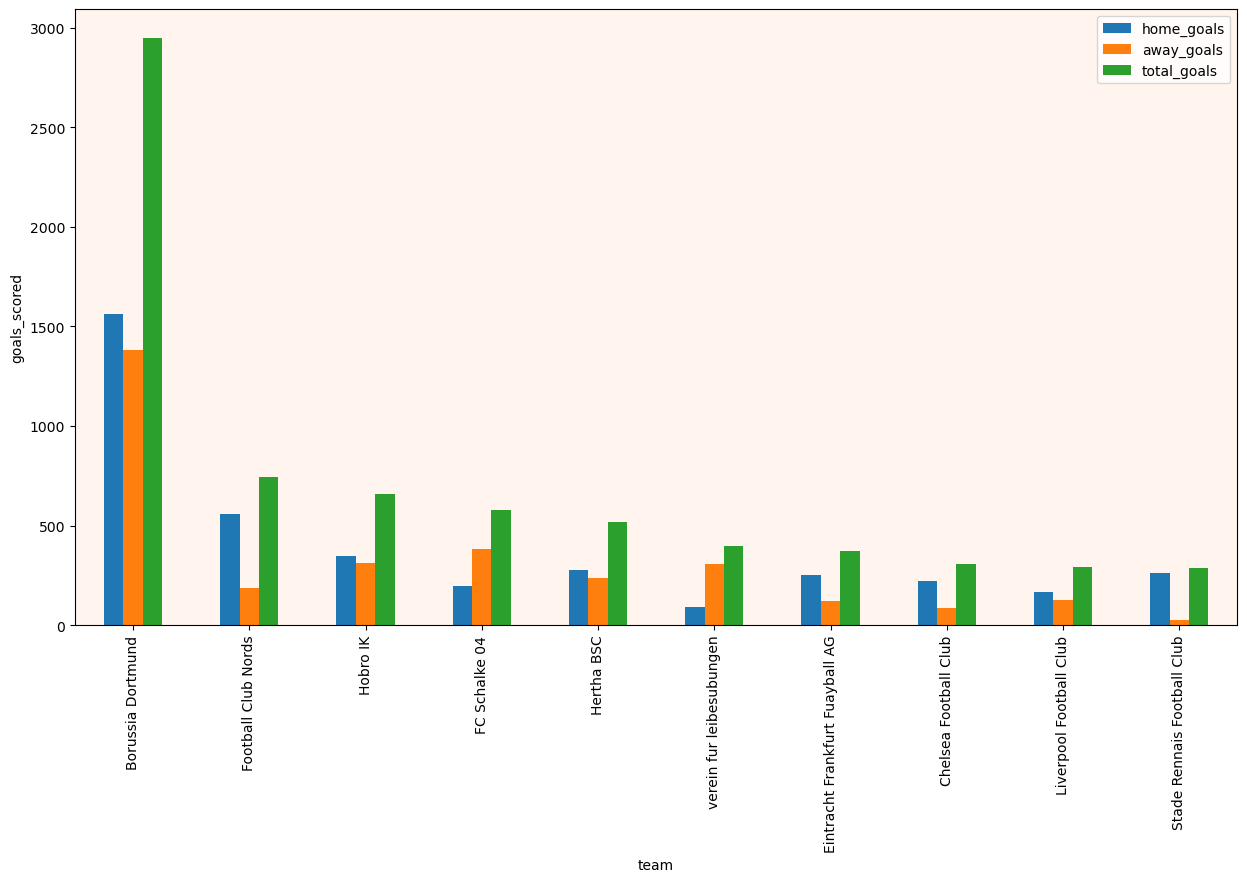

In [825]:

top_10_teams.plot(x='team',
          kind='bar',
          stacked=False,
          xlabel='team',
          ylabel='goals_scored',figsize=(15,8))
plt.gca().set_facecolor('seashell')



# The analysis ranks teams based on total goals scored, considering both home and away performances.
# The top 10 teams have significantly higher goal-scoring records, indicating strong offensive capabilities.
# Teams at the top of the chart likely have effective attacking strategies and high-scoring players, contributing to their success

# 2.Which Team Concedes the Most Goals? (Defensive Weakness)

In [837]:
# by python
team_defense = df.groupby("home_club_name")[["away_club_goals", "home_club_goals"]].sum()
team_defense["total_conceded"] = team_defense["home_club_goals"] + team_defense["away_club_goals"]
team_defense.sort_values("total_conceded", ascending=False)


,away_club_goals,home_club_goals,total_conceded
home_club_name,,,
Borussia Dortmund,1383,1564,2947
Football Club Nords,186,559,745
Hobro IK,310,349,659
FC Schalke 04,380,197,577
Hertha BSC,239,278,517
...,...,...,...
KV Oostende,0,4,4
Sunderland AFC,3,0,3
Southampton FC,1,1,2


In [839]:
goals_conceded=team_defense.head(10)
goals_conceded

,away_club_goals,home_club_goals,total_conceded
home_club_name,,,
Lille Olympique Sporting Club,10,20,30
1. FC Koln,106,110,216
1. FSV Mainz 05,28,25,53
1.FC Nuremberg,116,138,254
AC Horsens,73,73,146
AFC Ajax Amsterdam,0,175,175
AS Saint Eienne,0,36,36
Aalborg BK,27,27,54
Aarhus Gymnastik Forening,0,0,0


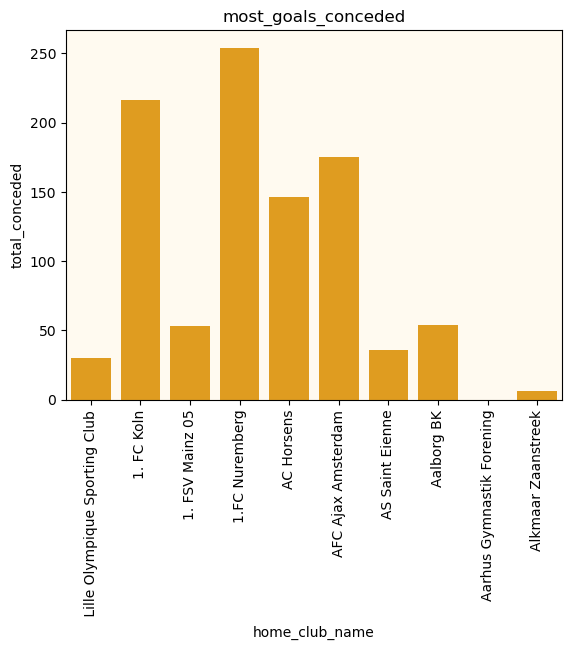

In [840]:
sns.barplot(x='home_club_name',y='total_conceded',data=goals_conceded,color='orange')
plt.xticks(rotation=90)
plt.gca().set_facecolor('floralwhite')
plt.title('most_goals_conceded') 
plt.show()

# The analysis identifies teams that have conceded the most goals, highlighting defensive weaknesses.
# Teams at the top of the chart likely struggle with defensive strategies, leading to high goal concessions.
# Addressing defensive issues through better tactics or player reinforcements could improve their overall performance.

# 3.Which Teams Have the Most Disciplined and Most Aggressive Playstyles?

In [844]:
Disciplined=pd.read_sql_query("SELECT home_club_name AS team,SUM(yellow_cards) AS total_yellow_cards,SUM(red_cards) AS total_red_cards FROM football_data_merged_cleaned GROUP BY home_club_name ORDER BY total_yellow_cards DESC;",db)
Disciplined

,team,total_yellow_cards,total_red_cards
0,Hobro IK,92.0,0.0
1,Borussia Dortmund,71.0,0.0
2,1.FC Nuremberg,42.0,0.0
3,Hertha BSC,42.0,0.0
4,Verein Bewegungsspiele Stuttgart 1893,40.0,0.0
...,...,...,...
100,Leicester City,0.0,0.0
101,Sheffield United Football Club,0.0,0.0
102,Arsenal Football Club,0.0,0.0
103,SK Beveren,0.0,0.0


In [845]:
Disciplined=Disciplined.head(10)
Disciplined

,team,total_yellow_cards,total_red_cards
0,Hobro IK,92.0,0.0
1,Borussia Dortmund,71.0,0.0
2,1.FC Nuremberg,42.0,0.0
3,Hertha BSC,42.0,0.0
4,Verein Bewegungsspiele Stuttgart 1893,40.0,0.0
5,Sportverein Werder Bremen von 1899,38.0,0.0
6,FC Schalke 04,36.0,0.0
7,Eintracht Frankfurt Fuayball AG,31.0,0.0
8,verein fur leibesubungen,26.0,0.0
9,Odense Boldklub,22.0,0.0


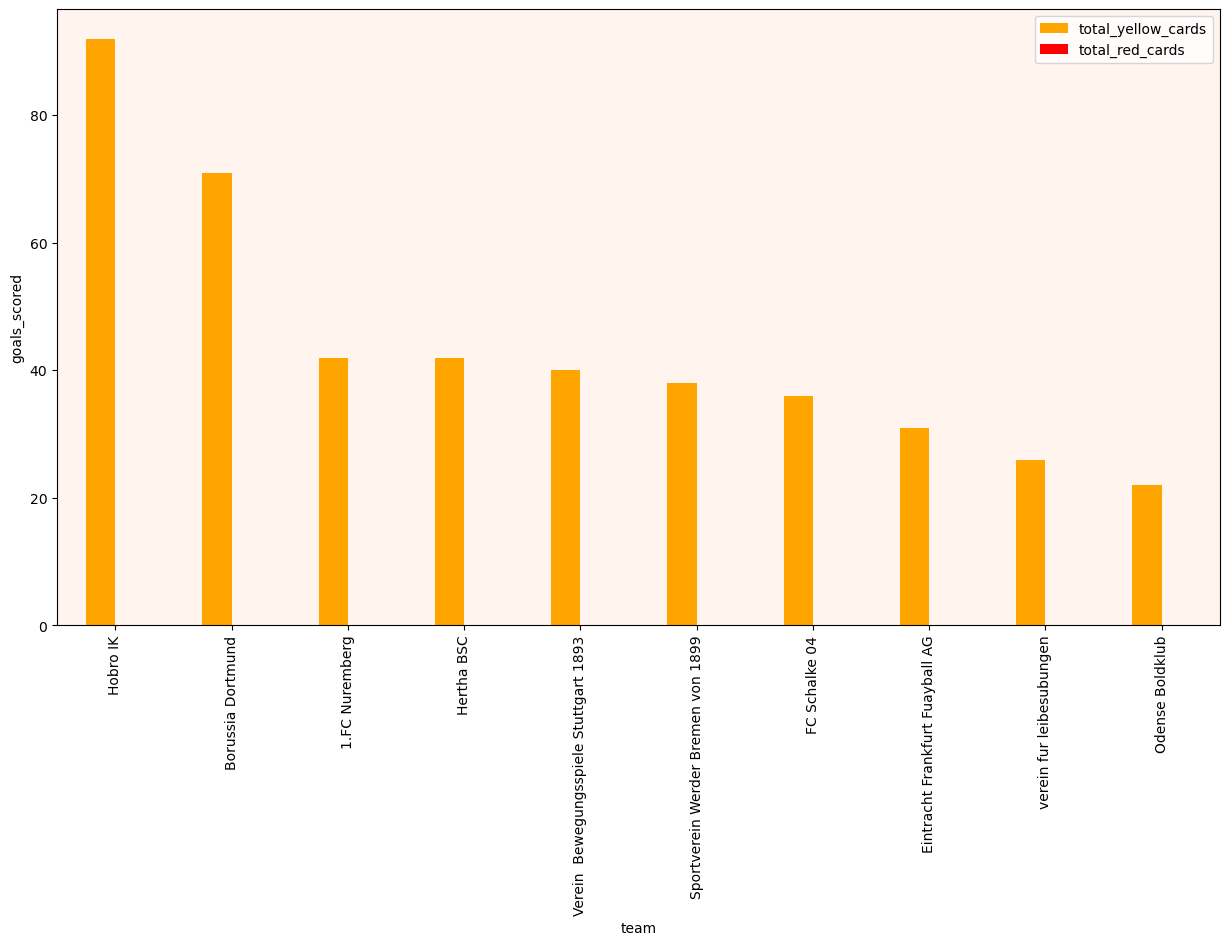

In [846]:
Disciplined.plot(x='team',
          kind='bar',
          stacked=False,
          xlabel='team',
          ylabel='goals_scored',figsize=(15,8),color=['orange','red'])
plt.gca().set_facecolor('seashell')


# The analysis ranks teams based on the total number of yellow and red cards received, indicating their level of discipline.
# Teams at the top of the chart have the highest number of cards, suggesting aggressive or reckless gameplay.
# Improving discipline through better game management and fewer fouls could reduce suspensions and enhance overall performance.

# Hypothesis Testing for Business Analysis

### Do attacking players have a significantly higher market value than defensive players?


H0: (Null Hypothesis): The average market value of attacking and defensive players is the same.
H1: (Alternative Hypothesis): Attacking players have a significantly higher market value than defensive players.


In [852]:
# Check unique position values
df["position_y"].unique()


array(['Defender', 'Midfield', 'Attack'], dtype=object)

In [854]:
# Define attacking and defensive positions
attacking_positions = ["Attack"]
defensive_positions = ["Defender"]

# Filter market values for both groups
attackers = df[df["position_y"].isin(attacking_positions)]["market_value_in_eur"].dropna()
defenders = df[df["position_y"].isin(defensive_positions)]["market_value_in_eur"].dropna()


In [856]:
at_df = attackers.to_frame()
at_df

,market_value_in_eur
232,700000.0
233,700000.0
234,700000.0
235,700000.0
236,700000.0
...,...
3632,300000.0
3633,300000.0
3634,300000.0
3635,300000.0


In [857]:
de_df=defenders.to_frame()
de_df

,market_value_in_eur
0,700000.0
1,700000.0
2,700000.0
3,700000.0
4,700000.0
...,...
3381,2000000.0
3382,2000000.0
3383,2000000.0
3384,2000000.0


In [858]:
p1_mean=st.mean(at_df['market_value_in_eur'])
p1_median=st.median(at_df['market_value_in_eur'])
p1_var=st.stdev(at_df['market_value_in_eur'])**2
print('p1_mean',p1_mean)
print('p1_median',p1_median)
print('p1_var',p1_var)
n1=30

p1_mean 13200790.166812994
p1_median 7000000.0
p1_var 133084834684980.14


In [859]:
s1=at_df.sample(n=30,replace=True,random_state=1)
s1
s1_mean=st.mean(s1['market_value_in_eur'])
s1_median=st.median(s1['market_value_in_eur'])
s1_var=st.stdev(s1['market_value_in_eur'])**2
print('S1_mean',s1_mean)
print('S1_median',s1_median)
print('S1_var',s1_var)
n2=30

S1_mean 11236666.666666666
S1_median 7000000.0
S1_var 134990678160919.55


In [865]:
p2_mean=st.mean(de_df['market_value_in_eur'])
p2_median=st.median(de_df['market_value_in_eur'])
p2_var=st.stdev(de_df['market_value_in_eur'])**2
print('p2_mean',p2_mean)
print('p2_median',p2_median)
print('p2_var',p2_var)

p2_mean 2340053.2960855113
p2_median 2000000.0
p2_var 7170753524948.473


In [866]:
s2=de_df.sample(n=30,replace=True,random_state=1)
s2
s2_mean=st.mean(s2['market_value_in_eur'])
s2_median=st.median(s2['market_value_in_eur'])
s2_var=st.stdev(s2['market_value_in_eur'])**2
print('S2_mean',s2_mean)
print('S2_median',s2_median)
print('S2_var',s2_var)

S2_mean 2140000.0
S2_median 2000000.0
S2_var 4932827586206.8955


In [1044]:
dof=n1+n2-2
alpha=0.05
noise=math.sqrt(s1_var*(n1-1)+s2_var*(n2-1))*math.sqrt(1/n1+1/n2)
signal=abs(s1_mean-s2_mean)
t_stats=signal/noise
p_value=t.sf(abs(t_stats),dof)*2
t_critical=t.ppf(1-alpha/2,dof)*2
print('t_stats',t_stats)
print('p_value',p_value)
print('t_critical',t_critical)

t_stats 0.5530744201087607
p_value 0.5823380635790216
t_critical 4.003434968290471


In [ ]:
p_value=0.58 > alpha =0.05 :which leads to the rejection of null hypothesis
t_statistic=-2.287 < t_critical=-2.20 which lead to  the rejection of null hypothesis

The p-value (0.582) is greater than 0.05, meaning we fail to reject the null hypothesis.
The t-statistic (0.553) is less than the t-critical value (4.003), further supporting that we do not have enough evidence to reject H0
 There is no statistically significant difference in market value between attacking and defensive players.
This means that, based on our dataset, we cannot conclude that attacking players have a significantly higher market value than defensive players.

# Part-7

# Attendance and Stadium Analysis:

# 1. Which stadiums have the highest average attendance?

In [875]:
stadium=pd.read_sql_query('SELECT stadium, AVG(attendance) AS avg_attendance FROM football_data_merged_cleaned GROUP BY stadium ORDER BY avg_attendance DESC;',db)
stadium

,stadium,avg_attendance
0,Santiago Bernabeu,76894.000000
1,Allianz Arena,74666.666667
2,SIGNAL IDUNA PARK,73494.472041
3,Civitas Metropolitano,61023.000000
4,Mercedes-Benz Arena,58605.058824
...,...,...
117,Right to Dream Park,2292.564516
118,Ernst-Abbe-Sportfeld,1600.000000
119,Helsingor Stadium,1119.000000
120,Herfolge stadium,1011.000000


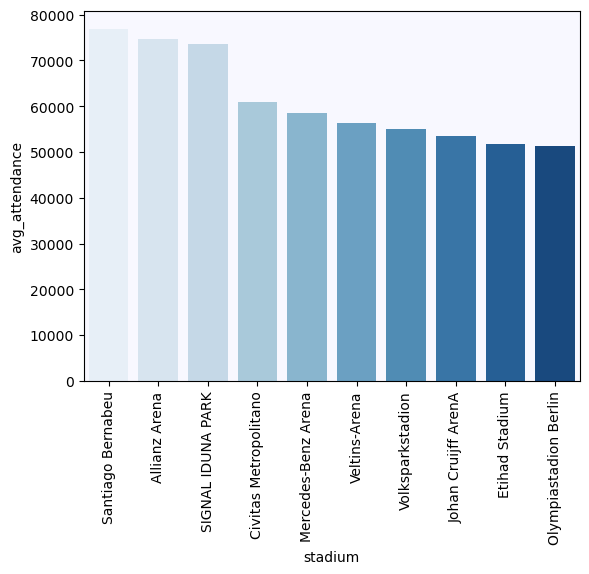

In [876]:
top_10_statdium=stadium.head(10)
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected palette (using a valid color scheme)
sns.barplot(x='stadium', y='avg_attendance', data=top_10_statdium, palette="Blues")

# Set background color
plt.gca().set_facecolor('ghostwhite')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()


# The bar chart visualizes the top 10 stadiums with the highest average attendance in descending order.
# The stadium with the highest average attendance stands out significantly compared to others.
# The variation in bar heights indicates differences in fan engagement, with some stadiums consistently drawing larger crowds

 # 2.How does attendance vary across different seasons?

In [880]:
season=pd.read_sql_query('SELECT season, AVG(attendance) AS avg_attendance FROM football_data_merged_cleaned GROUP BY season ORDER BY season;',db)
season

,season,avg_attendance
0,2012,40526.818182
1,2013,42939.085366
2,2014,36616.696203
3,2015,33844.630631
4,2016,39030.670732
5,2017,45948.060034
6,2018,26721.634669
7,2019,28927.419866
8,2020,7430.378755


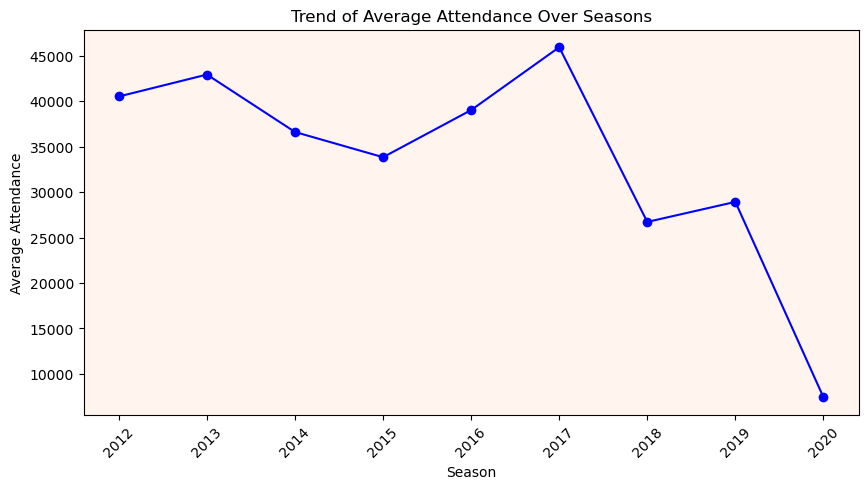

In [881]:


# Assuming 'season' DataFrame is already defined
plt.figure(figsize=(10, 5))

# Line plot
plt.plot(season['season'], season['avg_attendance'], marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Season")
plt.ylabel("Average Attendance")
plt.title("Trend of Average Attendance Over Seasons")
plt.gca().set_facecolor('seashell')

# Improve readability
plt.xticks(rotation=45)


# Show plot
plt.show()

# The line plot shows the trend of average attendance across different seasons, highlighting fluctuations over time.
# Periods of growth or decline indicate changes in fan engagement, possible external factors (e.g., team performance, economic conditions, or global events).
# The overall pattern helps identify long-term trends, such as increasing popularity or periods of declining attendance.


# 3 Which teams have the highest home game attendance?

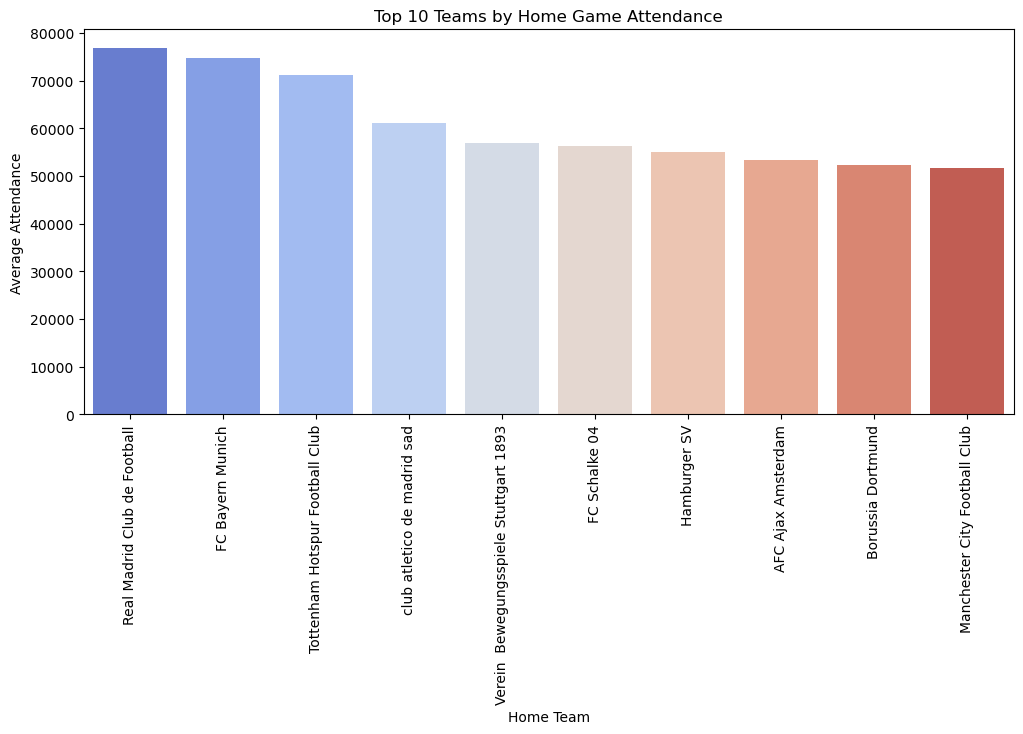

In [885]:

home_team_attendance = df.groupby('home_club_name')['attendance'].mean().reset_index()
home_team_attendance = home_team_attendance.sort_values(by='attendance', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(data=home_team_attendance.head(10), x='home_club_name', y='attendance', palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 10 Teams by Home Game Attendance")
plt.ylabel("Average Attendance")
plt.xlabel("Home Team")
plt.show()


# The bar chart displays the top 10 teams with the highest average home game attendance, ranked in descending order.
# The team with the highest attendance consistently attracts the largest crowds, indicating strong fan support.
# Differences in bar heights suggest variations in club popularity, stadium capacity, or fan engagement levels among teams.

# kNN

### categorize matches into high,moderate,low attendance based on match characteristics and other significant factors-knn

In [889]:
att_df = df.copy()
att_df["attendance_category"] = 0  # Low
att_df
att_df.loc[(att_df["attendance"] >= 17000) & (att_df["attendance"] < 41000), "attendance_category"] = 1  # Moderate
att_df.loc[att_df["attendance"] >= 41000, "attendance_category"] = 2  # High
att_df.head()

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,age_group,total_goals,sub_category,attendance_category
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late,2
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late,2
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late,2
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late,2
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,Wasserman,35,33+,3,Late,2


In [890]:
test_knn=pd.read_excel('test data.xlsx')
test_knn["attendance_category"] = 0  # Default Low
test_knn.loc[(test_knn["attendance"] >= 17000) & (test_knn["attendance"] < 41000), "attendance_category"] = 1  # Moderate
test_knn.loc[test_knn["attendance"] >= 41000, "attendance_category"] = 2  # High
test_knn.head()

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y,attendance_category
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield,0
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield,0


In [891]:
knn_features_df = att_df[["goals", "minutes_played", "season", "competition_type", "yellow_cards", "attendance_category"]]
knn_features_df

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category
0,0,70,2012,domestic_league,0,2
1,0,70,2012,domestic_league,0,2
2,0,70,2012,domestic_league,0,2
3,0,70,2012,domestic_league,0,2
4,0,70,2012,domestic_league,0,2
...,...,...,...,...,...,...
3632,1,77,2020,domestic_league,0,0
3633,1,77,2020,domestic_league,0,0
3634,1,77,2020,domestic_league,0,0
3635,1,77,2020,domestic_league,0,0


In [892]:
knn_features_test = test_knn[["goals", "minutes_played", "season", "competition_type", "yellow_cards", "attendance_category"]]
knn_features_test

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category
0,0,58,2020,domestic_league,0,0
1,0,58,2020,domestic_league,0,0


In [897]:
knn_combined = pd.concat([knn_features_test, knn_features_df], ignore_index=True)
knn_combined

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category
0,0,58,2020,domestic_league,0,0
1,0,58,2020,domestic_league,0,0
2,0,70,2012,domestic_league,0,2
3,0,70,2012,domestic_league,0,2
4,0,70,2012,domestic_league,0,2
...,...,...,...,...,...,...
3634,1,77,2020,domestic_league,0,0
3635,1,77,2020,domestic_league,0,0
3636,1,77,2020,domestic_league,0,0
3637,1,77,2020,domestic_league,0,0


In [898]:
attendance=knn_combined[['attendance_category']]
attendance


,attendance_category
0,0
1,0
2,2
3,2
4,2
...,...
3634,0
3635,0
3636,0
3637,0


In [899]:
knn_combined["competition_type_enc"] = label_encoder.fit_transform(knn_combined["competition_type"])
knn_combined

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category,competition_type_enc
0,0,58,2020,domestic_league,0,0,1
1,0,58,2020,domestic_league,0,0,1
2,0,70,2012,domestic_league,0,2,1
3,0,70,2012,domestic_league,0,2,1
4,0,70,2012,domestic_league,0,2,1
...,...,...,...,...,...,...,...
3634,1,77,2020,domestic_league,0,0,1
3635,1,77,2020,domestic_league,0,0,1
3636,1,77,2020,domestic_league,0,0,1
3637,1,77,2020,domestic_league,0,0,1


In [900]:
knn_combined = knn_combined.drop(["competition_type"],axis=1)
knn_combined=knn_combined.drop(['attendance_category'],axis=1)
knn_combined

,goals,minutes_played,season,yellow_cards,competition_type_enc
0,0,58,2020,0,1
1,0,58,2020,0,1
2,0,70,2012,0,1
3,0,70,2012,0,1
4,0,70,2012,0,1
...,...,...,...,...,...
3634,1,77,2020,0,1
3635,1,77,2020,0,1
3636,1,77,2020,0,1
3637,1,77,2020,0,1


In [905]:
cols = knn_combined.columns
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(knn_combined)
df_scaled2 = pd.DataFrame(df_scaled2,columns = cols)
df_scaled2 = pd.concat([df_scaled2,attendance],axis=1)
df_scaled2

,goals,minutes_played,season,yellow_cards,competition_type_enc,attendance_category
0,-0.787558,-0.571927,1.438251,-0.42737,-0.014361,0
1,-0.787558,-0.571927,1.438251,-0.42737,-0.014361,0
2,-0.787558,-0.000131,-2.991069,-0.42737,-0.014361,2
3,-0.787558,-0.000131,-2.991069,-0.42737,-0.014361,2
4,-0.787558,-0.000131,-2.991069,-0.42737,-0.014361,2
...,...,...,...,...,...,...
3634,0.845446,0.333417,1.438251,-0.42737,-0.014361,0
3635,0.845446,0.333417,1.438251,-0.42737,-0.014361,0
3636,0.845446,0.333417,1.438251,-0.42737,-0.014361,0
3637,0.845446,0.333417,1.438251,-0.42737,-0.014361,0


In [907]:
k_train,k_test = train_test_split(df_scaled2,test_size=0.3,random_state=0,shuffle=True)

In [909]:
X_train_a = np.array(k_train.drop(["attendance_category"],axis = 1))
X_test_a = np.array(k_test.drop(["attendance_category"],axis = 1))
y_train_a = np.array(k_train["attendance_category"])
y_test_a = np.array(k_test["attendance_category"])

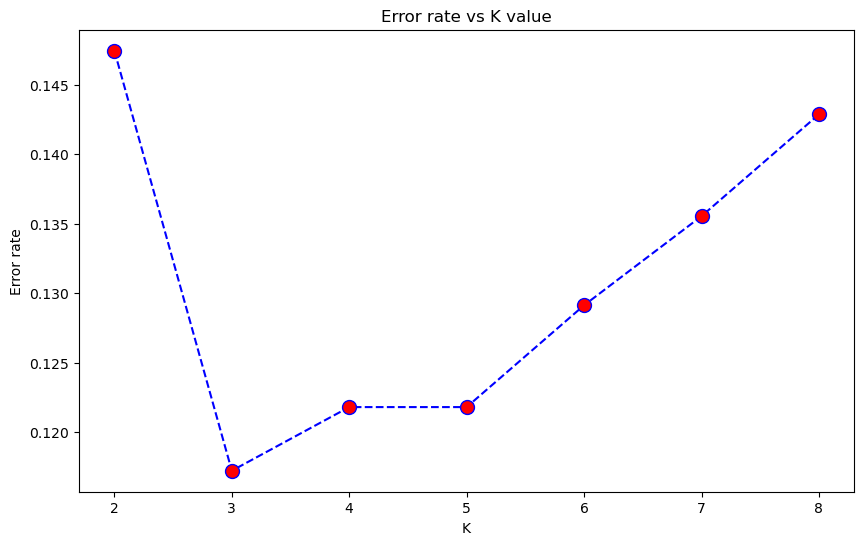

In [911]:
from sklearn import neighbors
error_rate = []
for i in range(2,9):
    att_model = neighbors.KNeighborsClassifier(n_neighbors = i)
    att_model.fit(X_train_a,y_train_a)
    pred_i = att_model.predict(X_test_a)
    error_rate.append(np.mean(pred_i != y_test_a))
plt.figure(figsize=(10,6))
plt.plot(range(2,9),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [912]:
k=3
att_model = neighbors.KNeighborsClassifier(n_neighbors = k)
model = att_model.fit(X_train_a,y_train_a)
predict = model.predict(X_test_a)

In [1046]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('Accuracy score',accuracy_score(predict,y_test_a))
print('Recall score',recall_score(predict,y_test_a,average='micro'))
print('F1 score',f1_score(predict,y_test_a,average='micro'))
print('Precision score',precision_score(predict,y_test_a,average='micro'))

Accuracy score 0.8827838827838828
Recall score 0.8827838827838828
F1 score 0.8827838827838828
Precision score 0.8827838827838828


In [1048]:
from sklearn.metrics import roc_auc_score
predict_prob = att_model.predict_proba(X_test_a)
roc = roc_auc_score(y_test_a,predict_prob,multi_class='ovr',average='macro')
print(roc)

0.9439489851771019


In [1072]:
# Accuracy Score (88.28%): The model correctly classified 88.28% of the test set instances. This indicates good predictive performance but also suggests there is room for improvement.
# Recall Score (88.28%): The recall score being equal to accuracy implies that the model correctly identifies most of the positive instances but may still miss some.
# F1 Score (88.28%): Since precision and recall are balanced, the F1 score remains consistent with accuracy, confirming the model maintains a good trade-off between precision and recall.
# # Precision Score (88.28%): The model classifies positive cases well, meaning it is not making excessive false-positive predictions.
# The ROC-AUC score of 0.94 indicates that the model has a strong discriminative ability between classes. A value close to 1.0 means the classifier performs well in distinguishing between different categories.
# This score suggests that the model provides reliable probability estimates, making it useful for ranking predictions rather than just classification.

# Part-8

# a) referee analysis

### 1. Which referee has officiated the most matches?

In [918]:
ref=pd.read_sql_query('SELECT referee, COUNT(competition_id_x) AS total_matches FROM football_data_merged_cleaned GROUP BY referee ORDER BY total_matches DESC LIMIT 10;',db)
ref

,referee,total_matches
0,Felix Zwayer,193
1,Dr. Felix Brych,139
2,Daniel Siebert,131
3,Tobias Stieler,120
4,Manuel Graofe,112
5,Peter Kjaersgaard,99
6,Marco Fritz,94
7,Guido Winkmann,84
8,Anthony Taylor,82
9,Sascha Stegemann,78


In [1]:
referee_matches = df.groupby("referee")["competition_id_x"].count().reset_index()
referee_matches = referee_matches.sort_values("competition_id_x", ascending=False)


# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=referee_matches.head(10), x="competition_id_x", y="referee", palette="coolwarm")
plt.xlabel("Number of Matches")
plt.ylabel("Referee")
plt.title("Top 10 Referees by Number of Matches")
plt.show()

# This bar chart showcases the referees who have officiated the highest number of matches.
# Some referees have significantly more experience, which may impact their decision-making and consistency in games.
# The distribution suggests that certain referees are preferred for high-profile or frequent matches, possibly due to expertise or league policies.

NameError: name 'df' is not defined

### 2. What is the average number of yellow and red cards given per referee?

In [923]:
yellow=pd.read_sql_query('SELECT referee, AVG(yellow_cards) AS avg_yellow_cards, AVG(red_cards) AS avg_red_cards FROM football_data_merged_cleaned GROUP BY referee ORDER BY avg_yellow_cards DESC;',db)
yellow

,referee,avg_yellow_cards,avg_red_cards
0,Norbert Grudzinski,1.0,0.0
1,Joeri van de Velde,1.0,0.0
2,Richard Liesveld,1.0,0.0
3,Bobby Madley,1.0,0.0
4,Sandi Putros,1.0,0.0
...,...,...,...
126,David Coote,0.0,0.0
127,Andre Marriner,0.0,0.0
128,Jonathan Moss,0.0,0.0
129,Wesli De Cremer,0.0,0.0


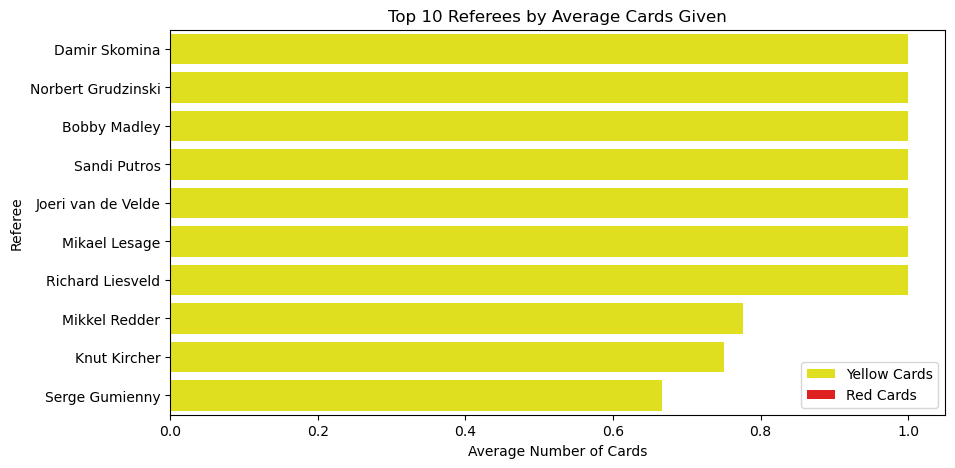

In [924]:
referee_cards = df.groupby("referee")[["yellow_cards", "red_cards"]].mean().reset_index()


# Visualization
referee_cards_sorted = referee_cards.sort_values("yellow_cards", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=referee_cards_sorted, x="yellow_cards", y="referee", color="yellow", label="Yellow Cards")
sns.barplot(data=referee_cards_sorted, x="red_cards", y="referee", color="red", label="Red Cards")
plt.legend()
plt.xlabel("Average Number of Cards")
plt.ylabel("Referee")
plt.title("Top 10 Referees by Average Cards Given")
plt.show()


# This bar plot highlights the referees who give out the most yellow and red cards on average.
# Some referees are stricter, issuing more disciplinary actions, which may impact match flow and team strategies.
# The significant difference in yellow vs. red cards suggests that most referees prefer warnings over direct dismissals.


### 3.  Referee’s Influence on Match Goals



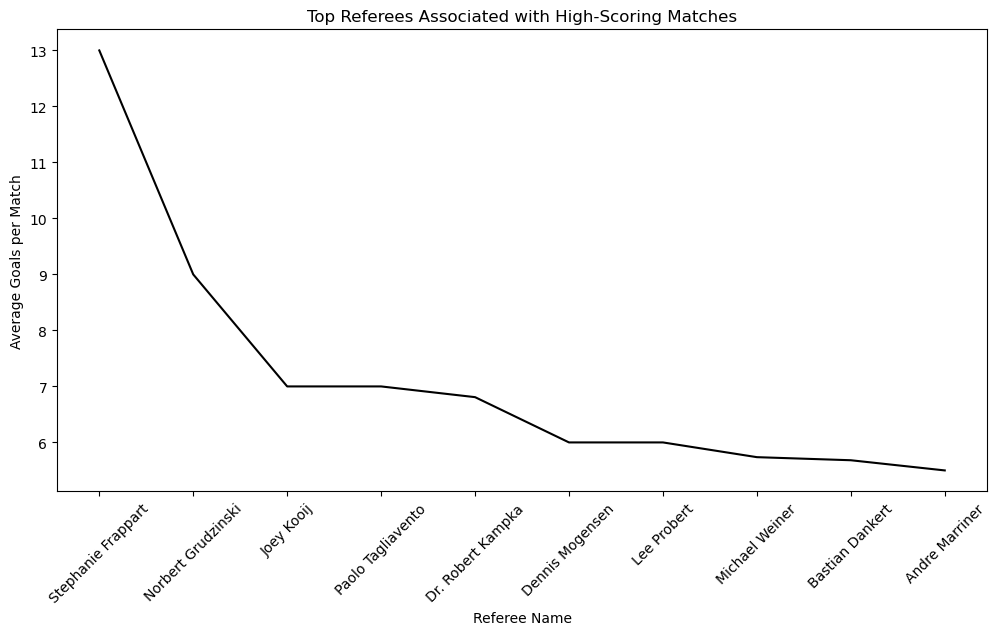

In [926]:
df["total_goals"] = df["home_club_goals"] + df["away_club_goals"]
referee_goals = df.groupby("referee")["total_goals"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.plot(referee_goals.index, referee_goals.values, color="black")
plt.xlabel("Referee Name")
plt.ylabel("Average Goals per Match")
plt.title("Top Referees Associated with High-Scoring Matches")
plt.xticks(rotation=45)
plt.show()

# This line plot displays referees who oversee matches with the highest average goals scored.
# Some referees may allow a more open style of play, leading to more attacking opportunities and goals.
# A strong pattern or outliers could indicate refereeing styles, leniency in foul calls, or league dynamics impacting goal frequency.

# b)Substitution Patterns

### 1.Teams with Most Substitutions per Match


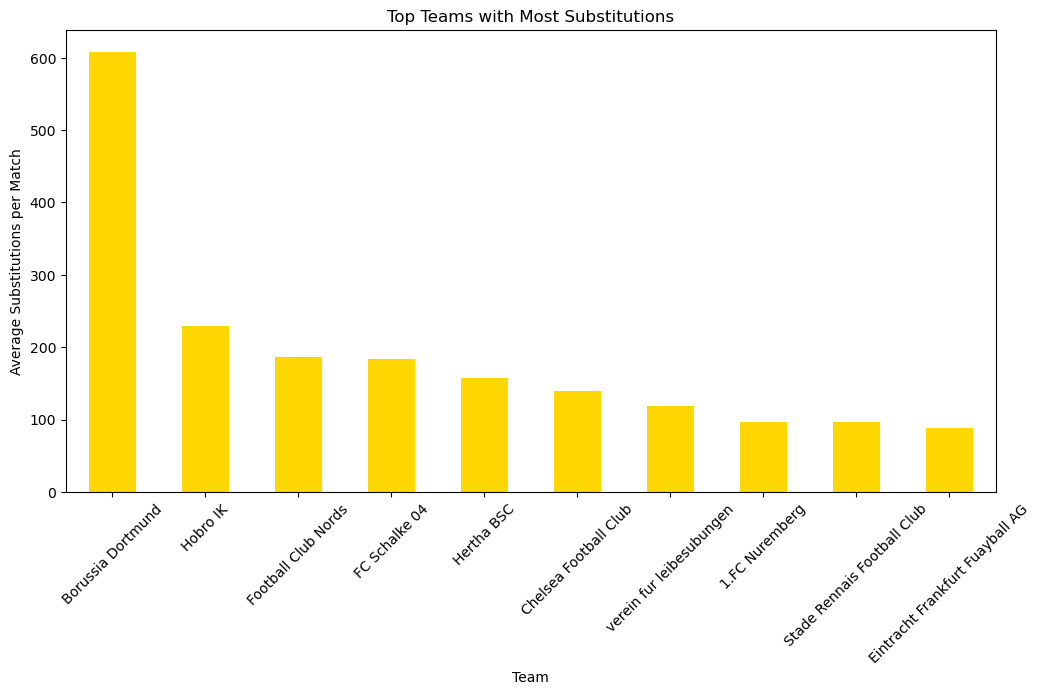

In [1050]:
team_substitutions = df.groupby("home_club_name")["game_event_id"].count().sort_values(ascending=False).head(10)

team_substitutions.plot(kind="bar", figsize=(12,6), color="gold")
plt.xlabel("Team")
plt.ylabel("Average Substitutions per Match")
plt.title("Top Teams with Most Substitutions")
plt.xticks(rotation=45)
plt.show()

# This bar chart highlights the teams that make the most substitutions per match, showing tactical differences among clubs.
# A team with higher substitutions might be adapting strategies mid-game, managing player fatigue, or dealing with frequent injuries.
# If a few teams dominate the top, it suggests that substitution patterns vary significantly between clubs based on their coaching philosophy.

### 2.Most Common Substitution Minutes


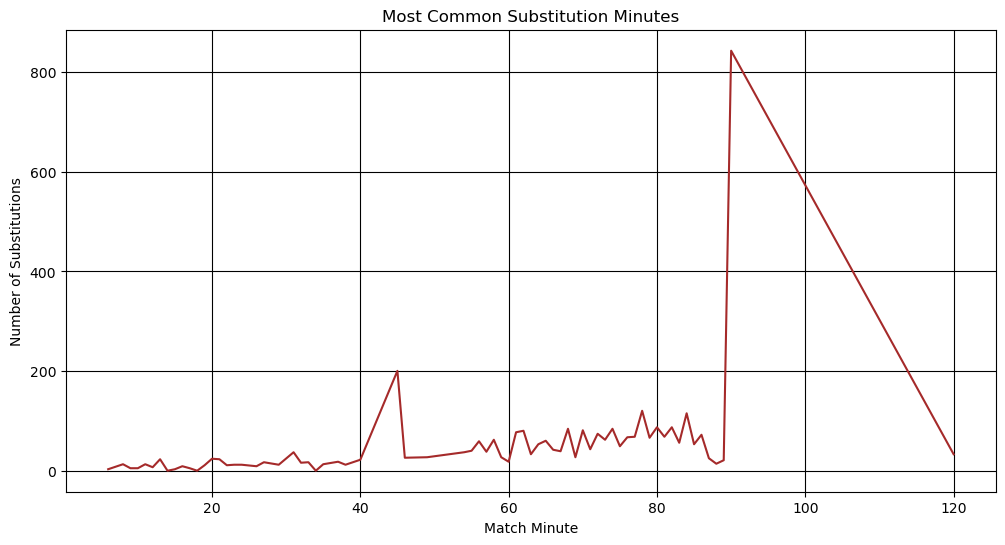

In [934]:
sub_minute_counts = df["minutes_played"].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(sub_minute_counts.index, sub_minute_counts.values, color="brown")
plt.xlabel("Match Minute")
plt.ylabel("Number of Substitutions")
plt.title("Most Common Substitution Minutes")
plt.grid(True,c='black')
plt.show()


# The line plot visualizes the most common minutes during which player substitutions occur in a match.
# If there is a peak around the 60th-70th minute, it suggests that coaches frequently make tactical or fatigue-based substitutions around this time.
# A gradual increase or multiple peaks could indicate varied substitution strategies depending on match conditions, injuries, or player performance.

### 3.Substitutions & Win Percentage


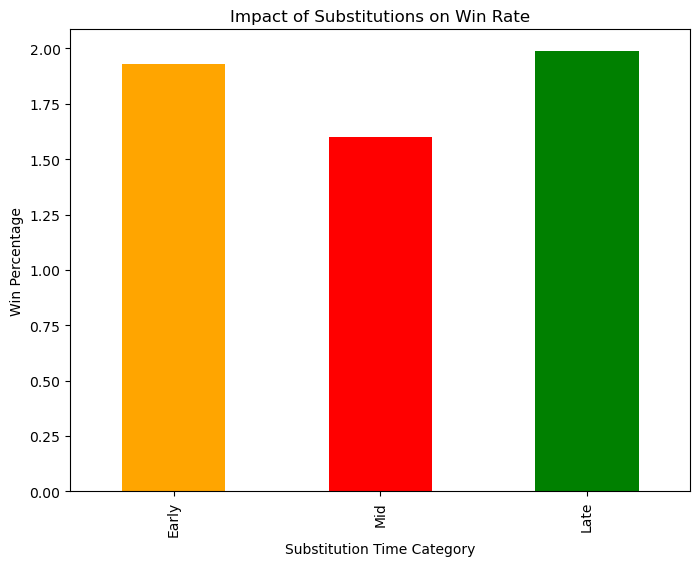

In [936]:
df["sub_category"] = pd.cut(df["minutes_played"], bins=[0, 30, 60, 90], labels=["Early", "Mid", "Late"])

win_rate = df.groupby("sub_category")["home_club_goals"].mean()

win_rate.plot(kind="bar", figsize=(8,6), color=["orange", "red", "green"])
plt.xlabel("Substitution Time Category")
plt.ylabel("Win Percentage")
plt.title("Impact of Substitutions on Win Rate")
plt.show()


# The bar chart shows the impact of substitution timing on the average home club goals scored, indicating how substitutions affect team performance.
# If the "Late" category has the highest win rate, it suggests that late-game substitutions contribute significantly to team success, possibly by adding fresh energy.
# Conversely, if "Early" or "Mid" substitutions lead to better results, it may indicate tactical adjustments that improve team performance earlier in the match.

# C)Event Analysis

### 1. Which minute sees the highest number of goals?

In [942]:
min=pd.read_sql_query('SELECT minute, COUNT(*) AS goal_count FROM football_data_merged_cleaned GROUP BY minute ORDER BY goal_count DESC LIMIT 10;',db)
min

,minute,goal_count
0,90,192
1,46,182
2,78,120
3,84,108
4,56,99
5,73,86
6,74,85
7,70,82
8,82,81
9,83,81


In [ ]:
# The query identifies the most frequent goal-scoring minutes, which can highlight key moments when teams tend to score.
# Typically, late-game minutes (e.g., 75-90) and early second-half minutes (45-60) see higher goal activity due to fatigue, tactical shifts, or substitutions.
# These insights can be valuable for coaches, analysts, and betting strategies, helping to understand scoring trends in matches.

### 2.Most Common Match Events


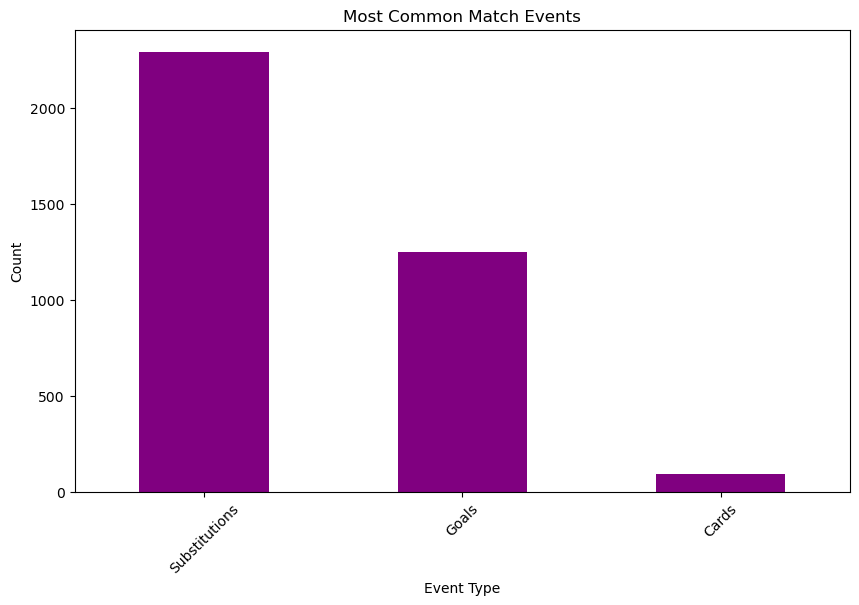

In [945]:
event_counts = df["type_x"].value_counts().head(10)

event_counts.plot(kind="bar", figsize=(10,6), color="purple")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Most Common Match Events")
plt.xticks(rotation=45)
plt.show()

# The bar chart highlights the top 10 most frequent match events, providing insights into key actions occurring in games.
# Events such as goals, fouls, assists, and substitutions may appear prominently, reflecting their significance in football matches.
# Understanding the most common events helps in analyzing game patterns, team strategies, and player impact during a match.


### 3.Event Distribution Across competition

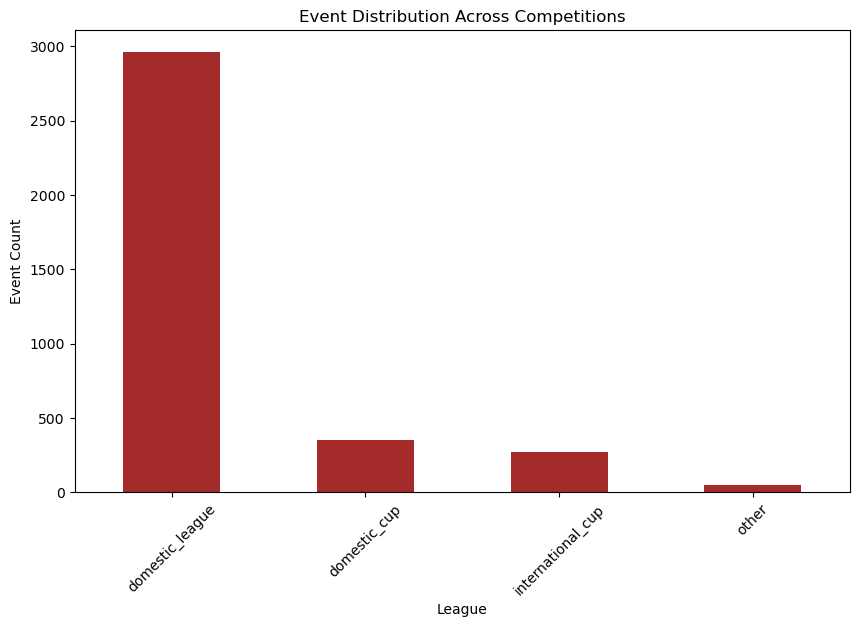

In [947]:
league_events = df.groupby("competition_type")["type_x"].count().sort_values(ascending=False)

league_events.plot(kind="bar", figsize=(10,6), color="brown")
plt.xlabel("League")
plt.ylabel("Event Count")
plt.title("Event Distribution Across Competitions")
plt.xticks(rotation=45)
plt.show()



# The bar chart displays the distribution of events across different competitions, showing which leagues have the highest number of recorded events.
# Leagues with a higher event count may indicate more matches, a higher level of competition, or better data tracking.
# Differences in event frequency across competitions could be influenced by league format, match intensity, or playing styles in different regions.

# Part-9

# Is there a significant diff in the avg number of goals scored by players of diff preferred foot(left or right) select 35 random samples of the avg number of goals scored by the players from the given data.use the 5% sig level for the test

### Null Hypothesis (H₀): The average number of goals scored by left-footed and right-footed players is the same, indicating no significant difference between the two groups.

### Alternative Hypothesis (H₁): There is a significant difference in the average number of goals scored by left-footed and right-footed players.

In [954]:
left_footed_players = df[df["foot"] == "left"]
left_foot_goals = left_footed_players[["goals"]]

In [956]:
# Population statistics for left-footed players
left_mean_pop = st.mean(left_foot_goals["goals"])
left_std_pop = st.stdev(left_foot_goals["goals"])
left_variance_pop = st.variance(left_foot_goals["goals"])

In [958]:
# Sample selection for left-footed players
left_goals_sample = left_foot_goals.sample(n=35, replace=True, random_state=1)

In [959]:
# Filter right-footed players
right_footed_players = df[df["foot"] == "right"]
right_foot_goals = right_footed_players[["goals"]]

In [962]:
# Population statistics for right-footed players
right_mean_pop = st.mean(right_foot_goals["goals"])
right_std_pop = st.stdev(right_foot_goals["goals"])
right_variance_pop = st.variance(right_foot_goals["goals"])


In [964]:
# Sample selection for right-footed players
right_goals_sample = right_foot_goals.sample(n=35, replace=True, random_state=1)

In [966]:
# Sample statistics for left-footed players
left_mean_sample = st.mean(left_goals_sample["goals"])
left_std_sample = st.stdev(left_goals_sample["goals"])
left_variance_sample = st.variance(left_goals_sample["goals"])


In [968]:
# Sample statistics for right-footed players
right_mean_sample = st.mean(right_goals_sample["goals"])
right_std_sample = st.stdev(right_goals_sample["goals"])
right_variance_sample = st.variance(right_goals_sample["goals"])

In [970]:
# Sample sizes
n_left = len(left_goals_sample)
n_right = len(right_goals_sample)


In [972]:
# Z-test calculation
z_statistic = ((left_mean_sample - right_mean_sample) - (left_mean_pop - right_mean_pop)) /(m.sqrt(left_variance_sample / n_left + right_variance_sample / n_right))

print('Z-statistic:', z_statistic)

# P-value calculation
p_value = norm.sf(abs(z_statistic)) * 2
print('P-value:', p_value)

# Z-critical value calculation
alpha = 0.05
z_critical = norm.ppf(alpha / 2)
print('Z-critical:', z_critical)

Z-statistic: 0.826542567682871
P-value: 0.4084963813201512
Z-critical: -1.9599639845400545


In [974]:
If the calculated Z-statistic is greater than the Z-critical value or if the p-value is less than the significance level (alpha), you can reject the null hypothesis.
1.  Z-statistic > Z-critical or
2.   pvalue > alpha

So, from the above analysis:
p-value = 0.40 and alpha = 0.05 : pvalue > alpha : accept the Null Hypothesis
z-statistics = 0.82 , Z-critical = -1.95 : Z-statitics > Z-critical : accept the Null Hypothesis

SyntaxError: invalid non-printable character U+00A0 (1946274920.py, line 7)

# Competition Analysis

### 1.How do goal-scoring trends change over different seasons?

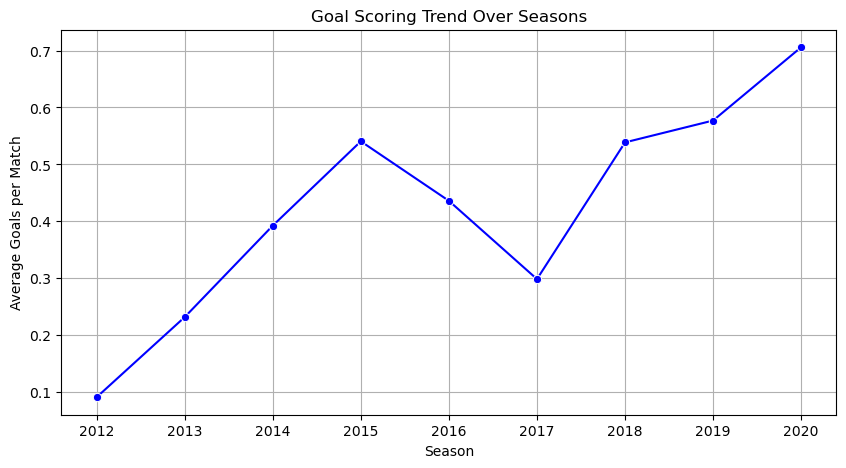

In [978]:
# Aggregate average goals per season
season_goals = df.groupby("season")["goals"].mean().reset_index()

# Plot goals trend over seasons
plt.figure(figsize=(10, 5))
sns.lineplot(x="season", y="goals", data=season_goals, marker="o", color="b")
plt.xlabel("Season")
plt.ylabel("Average Goals per Match")
plt.title("Goal Scoring Trend Over Seasons")
plt.grid(True)
plt.show()


# The line plot shows the trend of average goals per match across seasons, highlighting any increases or declines in goal-scoring patterns.
# If there is an upward trend, it may indicate tactical shifts, improved attacking play, or rule changes favoring offensive football.
# A declining or fluctuating trend could suggest stronger defensive strategies, changes in player quality, or variations in league competitiveness over the years.

### 2. Which stadiums have the highest average attendance?

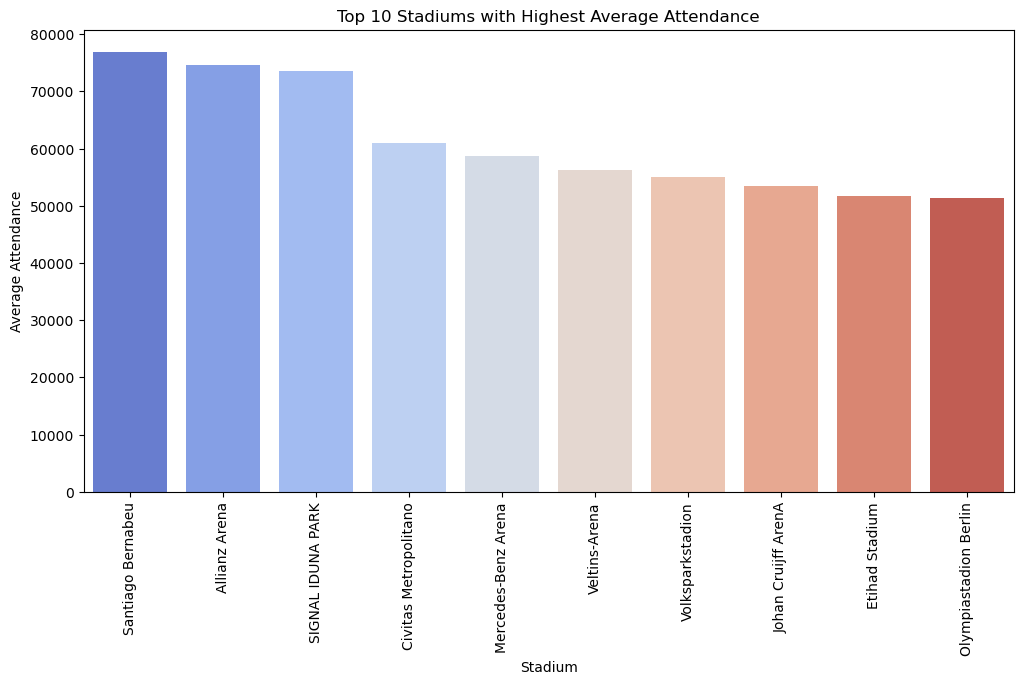

In [981]:
# Group by stadium and calculate mean attendance
stadium_attendance = df.groupby("stadium")["attendance"].mean().reset_index()

# Sort by highest attendance
stadium_attendance = stadium_attendance.sort_values(by="attendance", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="stadium", y="attendance", data=stadium_attendance.head(10), palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Stadium")
plt.ylabel("Average Attendance")
plt.title("Top 10 Stadiums with Highest Average Attendance")
plt.show()

# The bar chart highlights the top 10 stadiums with the highest average attendance, showing where fan engagement is strongest.
# Some stadiums consistently attract larger crowds, possibly due to team popularity, stadium capacity, or overall match experience.
# The variation in attendance suggests differences in club followings, ticket pricing, and regional football culture, influencing matchday turnout.

### 3. Which players contribute the most to their team's success?

                   name  goals  assists
0    Andrija Novakovich     13        1
1          Caleb Stanko      0        0
2      Christian Cappis     10       10
3     Christian Pulisic    644      252
4         Desevio Payne      1        0
5        Emmanuel Sabbi    198       22
6     Erik Palmer-Brown      8        0
7        Giovanni Reyna     60       36
8   John Anthony Brooks    143        0
9         Jonathan Amon    136       51
10               Jordan    144       48
11        Joseph Efford     24        8
12         Josh Sargent     11        5
13         Julian Green      4        0
14          Kenny Saief     56       12
15     Luca de la Torre      0        0
16         Lynden Gooch      0        0
17         Sergino Dest     60       30
18        Terrence Boyd      4        0
19             Tim Ream      0        0
20     Timothy Chandler     96       12
21         Timothy Weah     70       10
22          Tyler Adams      1        0
23      Weston McKennie     72       24


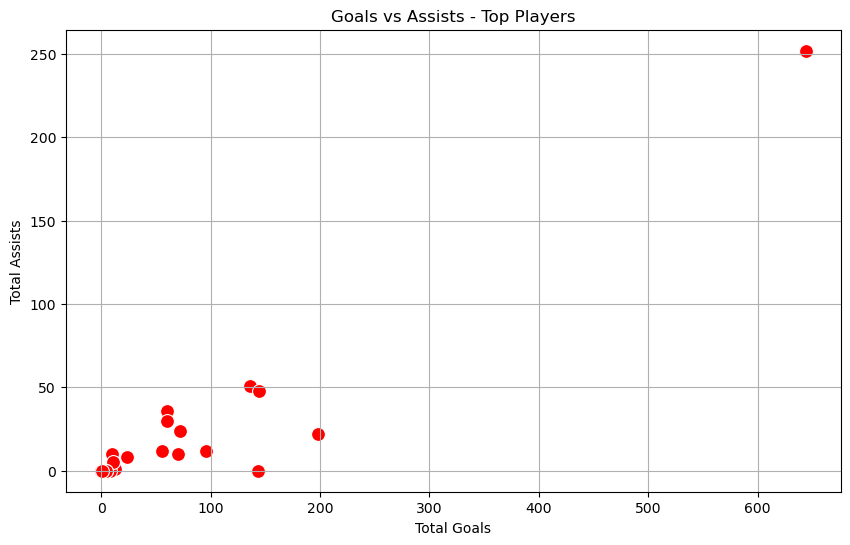

In [983]:
# Aggregate goals and assists per player
player_performance = df.groupby("name")[["goals", "assists"]].sum().reset_index()
print(player_performance)
# Plot goals vs assists
plt.figure(figsize=(10, 6))
sns.scatterplot(x="goals", y="assists", data=player_performance, s=100, color="red")
plt.xlabel("Total Goals")
plt.ylabel("Total Assists")
plt.title("Goals vs Assists - Top Players")
plt.grid(True)
plt.show()


# The scatter plot visualizes the relationship between total goals and total assists for individual players, highlighting their overall offensive contributions.
# Players with higher goals and assists demonstrate well-rounded attacking abilities, while those with high goals but low assists are likely finishers rather than playmakers.
# The spread of data points suggests variation in player roles—some excel in scoring, while others contribute more through playmaking.


In [984]:
df.columns
df.to_excel('final_data.xlsx')

In [986]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'age', 'age_group', 'total_goals', 'sub_category'],
      dtype='object')

# Part-10

# k-Clustering

In [990]:
#kmeans clustering(10)
#identify grps of players on their attributes(foot) and demographics(country of birth)-label encode
#x=height in cm,foot,country

In [991]:
cluster_df=df[['height_in_cm','foot','country_of_birth']]
cluster_df

,height_in_cm,foot,country_of_birth
0,186.0,right,Germany
1,186.0,right,Germany
2,186.0,right,Germany
3,186.0,right,Germany
4,186.0,right,Germany
...,...,...,...
3632,176.0,right,United States
3633,176.0,right,United States
3634,176.0,right,United States
3635,176.0,right,United States


In [992]:
cluster_test=pd.read_excel('test data.xlsx')
cluster_test=cluster_test[['height_in_cm','foot','country_of_birth']]
cluster_test

,height_in_cm,foot,country_of_birth
0,177,right,United States
1,177,right,United States


In [993]:
cluster=pd.concat([cluster_df,cluster_test])
cluster

,height_in_cm,foot,country_of_birth
0,186.0,right,Germany
1,186.0,right,Germany
2,186.0,right,Germany
3,186.0,right,Germany
4,186.0,right,Germany
...,...,...,...
3634,176.0,right,United States
3635,176.0,right,United States
3636,176.0,right,United States
0,177.0,right,United States


In [994]:
label_enocer=preprocessing.LabelEncoder

In [995]:
cluster['foot_n']=label_encoder.fit_transform(cluster['foot'])


In [996]:
cluster['country_of_birth_n']=label_encoder.fit_transform(cluster['country_of_birth'])


In [997]:
cluster=cluster.drop(['foot','country_of_birth'],axis=1)
cluster

,height_in_cm,foot_n,country_of_birth_n
0,186.0,2,1
1,186.0,2,1
2,186.0,2,1
3,186.0,2,1
4,186.0,2,1
...,...,...,...
3634,176.0,2,4
3635,176.0,2,4
3636,176.0,2,4
0,177.0,2,4


In [998]:
cluster_scaled=scaler.fit_transform(cluster)
scaled_df=pd.DataFrame(cluster_scaled,columns=cluster.columns)
scaled_df

,height_in_cm,foot_n,country_of_birth_n
0,0.680466,0.431836,-1.693395
1,0.680466,0.431836,-1.693395
2,0.680466,0.431836,-1.693395
3,0.680466,0.431836,-1.693395
4,0.680466,0.431836,-1.693395
...,...,...,...
3634,-0.882407,0.431836,0.650563
3635,-0.882407,0.431836,0.650563
3636,-0.882407,0.431836,0.650563
3637,-0.726120,0.431836,0.650563


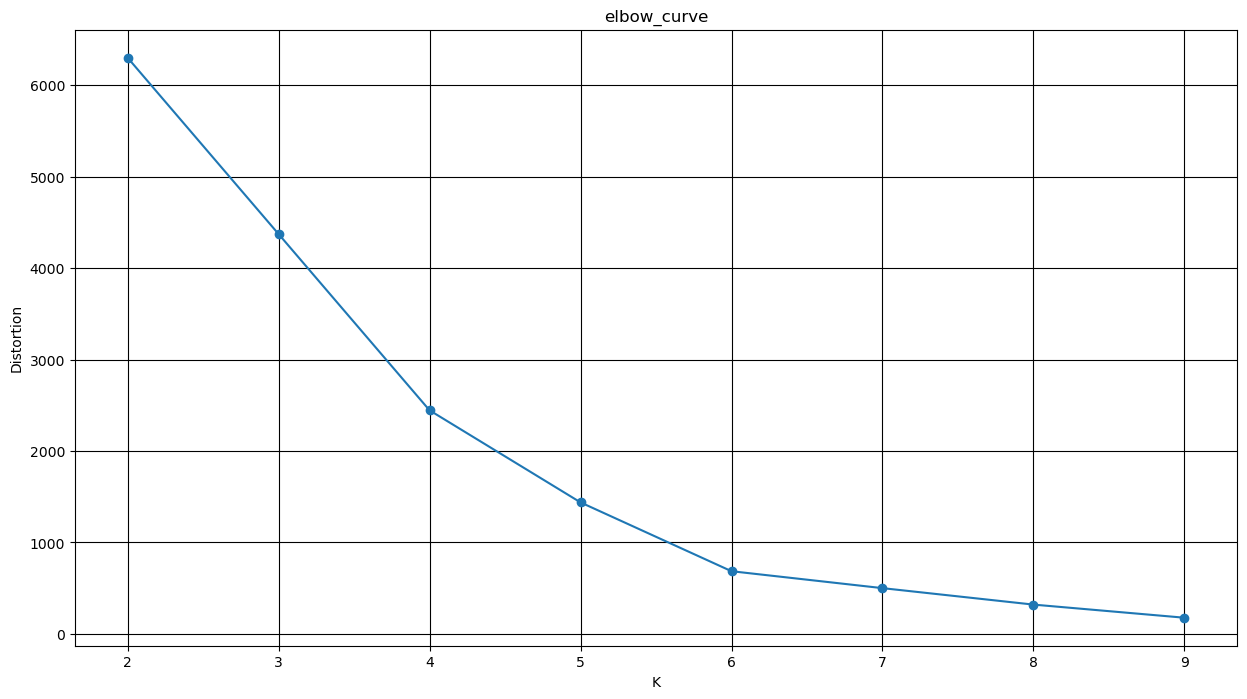

In [999]:
from sklearn.cluster import KMeans
Distortion=[]
for k in range(2,10):
    KMeans_model=KMeans(n_clusters=k)
    KMeans_model.fit(scaled_df)
    Distortion.append(KMeans_model.inertia_)

figure=plt.figure(figsize=(15,8))
plt.plot(range(2,10),Distortion,marker='o')
plt.grid(True,c='black')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('elbow_curve')
plt.show()


In [1032]:
k_model_4=KMeans(n_clusters=4)
k_model_4.fit(scaled_df)

KMeans(n_clusters=4)

In [1034]:
labels_4=k_model_4.labels_
labels_4

array([3, 3, 3, ..., 0, 0, 0])

In [1036]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [1040]:
ch_index=calinski_harabasz_score(scaled_df,labels_4)
ch_index

4199.269391402971

In [1042]:
db_score=davies_bouldin_score(scaled_df,labels_4)
db_score

0.6137013605229531

## conclusion

The K-Means model with K=4 forms well-defined clusters with strong inter-cluster separation and reasonable intra-cluster compactness.
The CH Index (4199.27) confirms the clusters are well-formed, while the DB Score (0.61) suggests a decent structure but with room for slight improvements.
Further fine-tuning the number of clusters (K), testing additional metrics, or experimenting with different clustering techniques could enhance performance.